# Proyecto de Clasificación de Riesgo Crediticio
## Grupo Inmobiliario JETC

**Autores:**
- Jeiner Muñoz Olivera
- Oscar Giraldo Castillo

## Índice

1. [Contexto del Negocio](#1-contexto-del-negocio)
2. [Objetivos del Proyecto](#2-objetivos-del-proyecto)
   - 2.1 [Objetivo General](#21-objetivo-general)
   - 2.2 [Objetivos Específicos](#22-objetivos-específicos)
3. [Descripción del Dataset](#3-descripción-del-dataset)
4. [Análisis Exploratorio de Datos (EDA)](#4-análisis-exploratorio-de-datos-eda)
   - 4.1 [Carga de Librerías](#41-carga-de-librerías)
   - 4.2 [Carga del Dataset](#42-carga-del-dataset)
   - 4.3 [Exploración Inicial](#43-exploración-inicial)
   - 4.4 [Análisis de la Variable Objetivo](#44-análisis-de-la-variable-objetivo)
   - 4.5 [Correlaciones](#45-correlaciones)
   - 4.6 [Distribuciones](#46-distribuciones)
   - 4.7 [Análisis Bivariado](#47-análisis-bivariado)
5. [Manipulación y Preparación de Datos](#5-manipulación-y-preparación-de-datos)
   - 5.1 [Definición de Features y Target](#51-definición-de-features-y-target)
   - 5.2 [División Train-Test](#52-división-train-test)
   - 5.3 [Encoding de Variables Categóricas](#53-encoding-de-variables-categóricas)
   - 5.4 [Escalado de Features](#54-escalado-de-features)
   - 5.5 [Encoding de Variable Objetivo](#55-encoding-de-variable-objetivo)
   - 5.6 [Balanceo con SMOTE](#56-balanceo-con-smote)
6. [Modelamiento](#6-modelamiento)
   - 6.1 [Modelos Supervisados](#61-modelos-supervisados)
     - 6.1.1 [Decision Tree - Gini](#611-decision-tree---gini)
     - 6.1.2 [Decision Tree - Entropy](#612-decision-tree---entropy)
     - 6.1.3 [Random Forest](#613-random-forest)
     - 6.1.4 [XGBoost](#614-xgboost)
     - 6.1.5 [Regresión Logística](#615-regresión-logística)
   - 6.2 [Modelos No Supervisados](#62-modelos-no-supervisados)
     - 6.2.1 [K-Means Clustering](#621-k-means-clustering)
7. [Evaluación y Comparación de Modelos](#7-evaluación-y-comparación-de-modelos)
8. [Conclusiones y Recomendaciones](#8-conclusiones-y-recomendaciones)

---

# 1. Contexto del Negocio

### Grupo Inmobiliario JETC

**Grupo Inmobiliario JETC** es una empresa especializada en la venta de propiedades residenciales y comerciales que ofrece opciones de financiamiento directo a sus clientes. En los últimos años, la compañía ha experimentado un crecimiento significativo en su cartera de créditos, lo que ha generado nuevos desafíos en la gestión del riesgo crediticio.

### Problemática

El departamento administrativo de JETC enfrenta dificultades para:

1. **Evaluar de forma objetiva** el riesgo crediticio de los solicitantes de financiamiento
2. **Identificar patrones** que permitan anticipar el comportamiento de pago de los clientes
3. **Reducir la morosidad** y mejorar la recuperación de cartera
4. **Optimizar la asignación de recursos** para seguimiento y cobranza

Actualmente, la evaluación de riesgo se realiza de manera manual y subjetiva, basándose principalmente en la experiencia del personal administrativo. Este enfoque presenta limitaciones en términos de escalabilidad, consistencia y precisión.

### Oportunidad

La empresa cuenta con un historial de **365 clientes** con información sobre su comportamiento crediticio, características demográficas y detalles de sus contratos. Este dataset representa una oportunidad para implementar **modelos de Machine Learning** que permitan:

- Clasificar automáticamente el nivel de riesgo (ALTO, MEDIO, BAJO) de nuevos solicitantes
- Identificar las variables más influyentes en el comportamiento de pago
- Tomar decisiones basadas en datos para mejorar la gestión de la cartera crediticia

Este proyecto busca desarrollar e implementar soluciones de ciencia de datos que apoyen la toma de decisiones estratégicas en el área de crédito y cobranza del Grupo Inmobiliario JETC.

# 2. Objetivos del Proyecto

### 2.1. Objetivo General

Desarrollar y evaluar modelos de Machine Learning (supervisados y no supervisados) para la **clasificación automática del riesgo crediticio** de clientes del Grupo Inmobiliario JETC, con el fin de optimizar el proceso de evaluación crediticia y mejorar la gestión de la cartera.

### 2.2. Objetivos Específicos

1. **Realizar un análisis exploratorio exhaustivo** del dataset de clientes para identificar patrones, correlaciones y características relevantes que influyen en el nivel de riesgo crediticio.

2. **Implementar y comparar múltiples algoritmos de clasificación supervisada** (Decision Tree, Random Forest, XGBoost, Regresión Logística) para predecir el nivel de riesgo (ALTO, MEDIO, BAJO) con la mayor precisión posible, evaluando el impacto del balanceo de clases mediante SMOTE.

3. **Aplicar técnicas de clustering no supervisado** (K-Means) para descubrir segmentos naturales de clientes y comprender mejor la estructura de los datos.

4. **Evaluar el desempeño de los modelos** mediante métricas estándar (accuracy, precision, recall, F1-score) y seleccionar el modelo óptimo que mejor equilibre precisión y generalización para su implementación en producción.

# 3. Descripción del Dataset

El dataset contiene información de **366 clientes** del Grupo Inmobiliario JETC con las siguientes características:

### Variables del Dataset

| Variable | Tipo | Descripción |
|----------|------|-------------|
| **num_contratos** | int | Número de contratos activos del cliente |
| **prom_dias_retraso** | float | Promedio de días de retraso en pagos |
| **cuotas_mora** | int | Número total de cuotas pagadas con mora |
| **edad** | int | Edad del cliente en años |
| **plazo** | int | Plazo del crédito en meses (36, 48, 60) |
| **precio_final** | float | Monto total del crédito en dólares |
| **sexo** | str (categórica) | Género del cliente (Masculino, Femenino) |
| **ciudad** | str (categórica) | Ciudad de residencia del cliente |
| **riesgo** | str (categórica) | **Variable objetivo**: Nivel de riesgo crediticio (ALTO, MEDIO, BAJO) |

### Notas sobre el Dataset

- **Variables excluidas**: Se han eliminado `new_id`, `fecha_calculo` y `refin_count` por no aportar valor predictivo
- **Variables demográficas**: Se incluye variables demográficas (`sexo` y `ciudad`) para un análisis más completo del perfil del cliente
- **Balance de clases**: El dataset presenta desbalance con mayor proporción de clientes de riesgo MEDIO y ALTO
- **Valores faltantes**: No se observan valores nulos en ninguna variable

### Distribución de la Variable Objetivo

La distribución del riesgo en el dataset muestra:
- **MEDIO**: ~46% (169 clientes)
- **ALTO**: ~34% (125 clientes)  
- **BAJO**: ~20% (72 clientes)

Este desbalance será tratado mediante técnicas de balanceo (SMOTE) durante el modelamiento.

# 4. Análisis Exploratorio de Datos (EDA)

### 4.1. Carga de Librerías

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.cluster import DBSCAN, KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    silhouette_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import category_encoders as ce


warnings.filterwarnings("ignore")
%matplotlib inline

sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 11


def print_title(title: str):
    print("=" * 60)
    print(title)
    print("=" * 60)


### 4.2. Carga del Dataset

In [2]:
url = "https://drive.google.com/uc?id=1PKcz0JIwXHr7Rc5-2jaxoxuloqXQJrwp"
df_raw = pd.read_csv(url)
print(f"Dimensiones del dataset original: {df_raw.shape}")
df_raw.head()

Dimensiones del dataset original: (365, 12)


,new_id,num_contratos,prom_dias_retraso,cuotas_mora,refin_count,edad,plazo,precio_final,riesgo,fecha_calculo,sexo,ciudad
0,0d6ceb3f,1,1.93,6,0,27,60,48849.55,BAJO,2025-11-04 23:26:34,Femenino,Lambayeque
1,3f619e89,1,7.61,14,0,30,36,49367.12,MEDIO,2025-11-04 23:26:34,Masculino,Lima
2,7979c1c4,1,3.45,15,0,28,60,37369.97,MEDIO,2025-11-04 23:26:34,Femenino,Lambayeque
3,aacd54ad,1,6.82,25,0,29,60,24377.79,ALTO,2025-11-04 23:26:34,Femenino,Piura
4,8f32962e,2,4.08,17,0,29,36,59521.84,MEDIO,2025-11-04 23:26:34,Masculino,Piura


In [3]:
# Eliminamos columnas que no aportan valor predictivo
df = df_raw.drop(["new_id", "fecha_calculo", "refin_count"], axis=1)
print(f"Dimensiones después de limpieza: {df.shape}")
df.head()

Dimensiones después de limpieza: (365, 9)


,num_contratos,prom_dias_retraso,cuotas_mora,edad,plazo,precio_final,riesgo,sexo,ciudad
0,1,1.93,6,27,60,48849.55,BAJO,Femenino,Lambayeque
1,1,7.61,14,30,36,49367.12,MEDIO,Masculino,Lima
2,1,3.45,15,28,60,37369.97,MEDIO,Femenino,Lambayeque
3,1,6.82,25,29,60,24377.79,ALTO,Femenino,Piura
4,2,4.08,17,29,36,59521.84,MEDIO,Masculino,Piura


### 4.3. Exploración Inicial

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_contratos      365 non-null    int64  
 1   prom_dias_retraso  365 non-null    float64
 2   cuotas_mora        365 non-null    int64  
 3   edad               365 non-null    int64  
 4   plazo              365 non-null    int64  
 5   precio_final       365 non-null    float64
 6   riesgo             365 non-null    object 
 7   sexo               365 non-null    object 
 8   ciudad             365 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 25.8+ KB


In [5]:
print_title("VALORES FALTANTES POR COLUMNA")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No hay valores faltantes en el dataset")

VALORES FALTANTES POR COLUMNA
✅ No hay valores faltantes en el dataset


In [6]:
print_title("ESTADÍSTICA DE VARIABLES NUMÉRICAS")
df.describe()

ESTADÍSTICA DE VARIABLES NUMÉRICAS


,num_contratos,prom_dias_retraso,cuotas_mora,edad,plazo,precio_final
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1.005479,6.227644,17.980822,25.616438,49.150685,42427.316247
std,0.073922,3.286147,9.146077,2.639671,9.736743,10941.508102
min,1.000000,0.000000,0.000000,21.000000,36.000000,24135.400000
25%,1.000000,3.670000,11.000000,23.000000,36.000000,36253.340000
50%,1.000000,6.420000,18.000000,26.000000,48.000000,38289.860000
75%,1.000000,8.920000,25.000000,28.000000,60.000000,49287.640000
max,2.000000,13.170000,38.000000,30.000000,60.000000,59946.390000


In [7]:
print_title("DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS")

categorical_cols = ["sexo", "ciudad", "riesgo"]

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 40)
    print(df[col].value_counts())
    print(f"\nTotal de categorías únicas: {df[col].nunique()}")

DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS

SEXO:
----------------------------------------
sexo
Masculino    188
Femenino     177
Name: count, dtype: int64

Total de categorías únicas: 2

CIUDAD:
----------------------------------------
ciudad
Lima           63
Cusco          57
Lambayeque     56
Piura          56
Arequipa       51
Cajamarca      43
La Libertad    39
Name: count, dtype: int64

Total de categorías únicas: 7

RIESGO:
----------------------------------------
riesgo
MEDIO    169
ALTO     125
BAJO      71
Name: count, dtype: int64

Total de categorías únicas: 3


### 4.4. Análisis de la Variable Objetivo

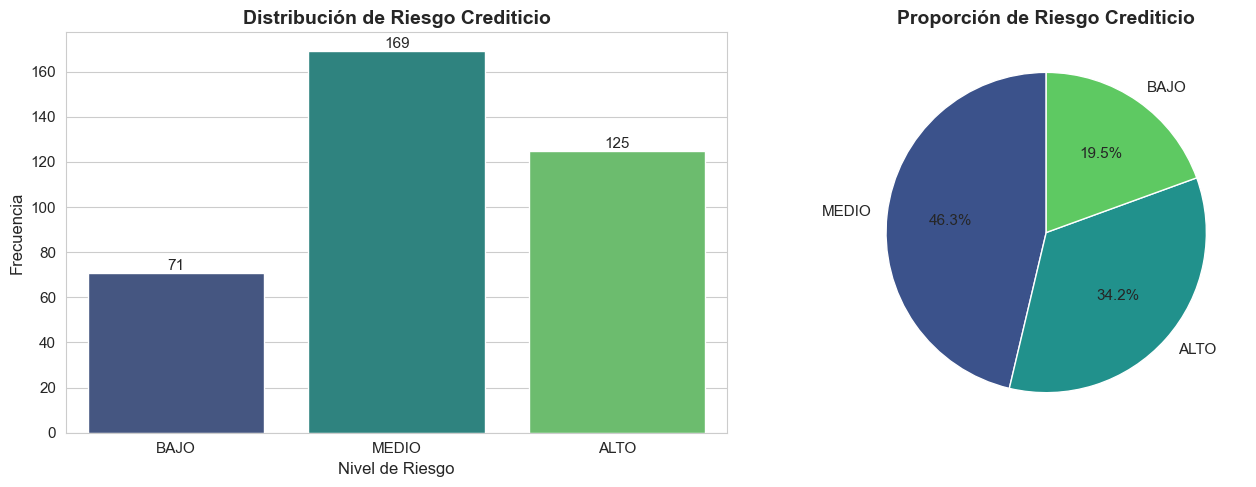


⚠️ OBSERVACIÓN: Existe desbalance en las clases. Se aplicará SMOTE para balanceo.


In [8]:
riesgo_counts = df["riesgo"].value_counts()

# Visualización de la distribución del riesgo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
sns.countplot(
    data=df,
    x="riesgo",
    order=["BAJO", "MEDIO", "ALTO"],
    palette="viridis",
    ax=axes[0],
)
axes[0].set_title("Distribución de Riesgo Crediticio", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Nivel de Riesgo", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)

# Agregar valores encima de las barras
for container in axes[0].containers:
    axes[0].bar_label(container)

# Gráfico de pastel
colors = sns.color_palette("viridis", 3)
axes[1].pie(
    riesgo_counts.values,
    labels=riesgo_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
)
axes[1].set_title("Proporción de Riesgo Crediticio", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

print(
    "\n⚠️ OBSERVACIÓN: Existe desbalance en las clases. Se aplicará SMOTE para balanceo."
)

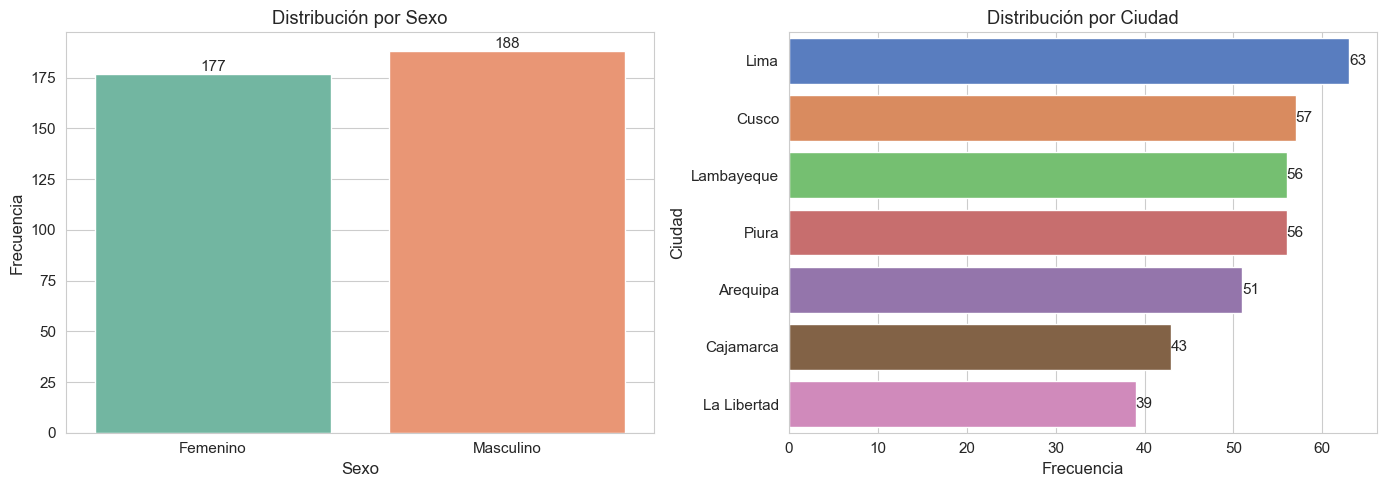

In [9]:
# Visualización de variables demográficas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución por sexo
sns.countplot(data=df, x="sexo", palette="Set2", ax=axes[0])
axes[0].set_title("Distribución por Sexo")
axes[0].set_xlabel("Sexo", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)

# Agregar labels
for container in axes[0].containers:
    axes[0].bar_label(container)

# Distribución por ciudad
ciudad_counts = df["ciudad"].value_counts()
sns.barplot(x=ciudad_counts.values, y=ciudad_counts.index, palette="muted", ax=axes[1])
axes[1].set_title("Distribución por Ciudad")
axes[1].set_xlabel("Frecuencia", fontsize=12)
axes[1].set_ylabel("Ciudad", fontsize=12)

# Agregar labels
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

### 4.5. Correlaciones

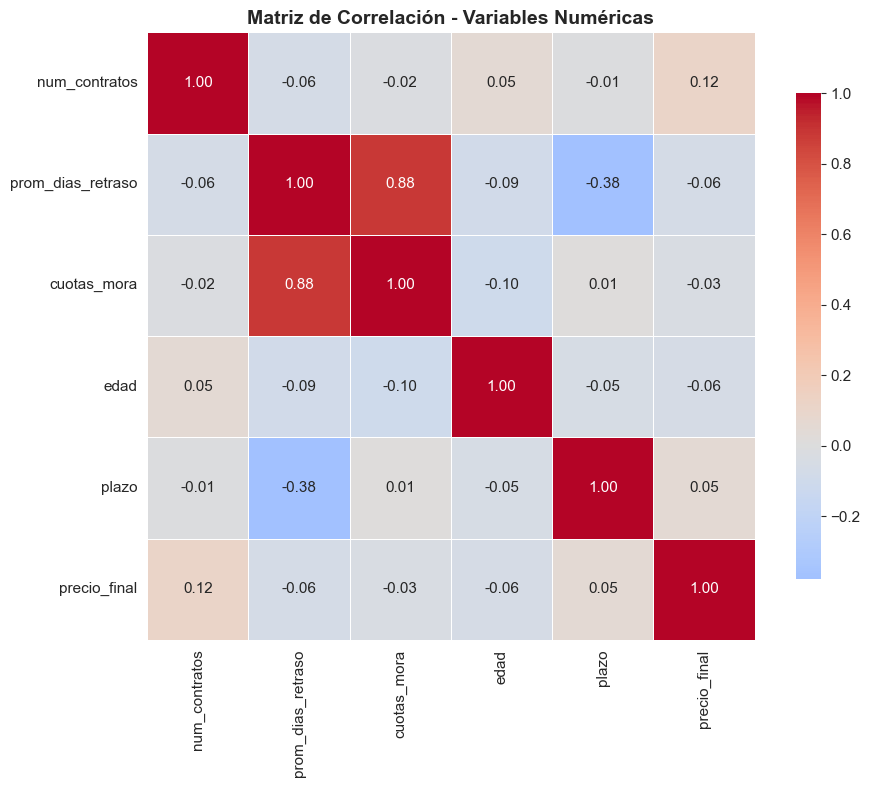

ANÁLISIS DE CORRELACIONES
Correlaciones ordenadas:

  prom_dias_retraso    <-> cuotas_mora         :  0.882
  prom_dias_retraso    <-> plazo               : -0.379
  num_contratos        <-> precio_final        :  0.117
  cuotas_mora          <-> edad                : -0.103
  prom_dias_retraso    <-> edad                : -0.090
  num_contratos        <-> prom_dias_retraso   : -0.062
  prom_dias_retraso    <-> precio_final        : -0.061
  edad                 <-> precio_final        : -0.058
  num_contratos        <-> edad                :  0.053
  plazo                <-> precio_final        :  0.050
  edad                 <-> plazo               : -0.048
  cuotas_mora          <-> precio_final        : -0.035
  num_contratos        <-> cuotas_mora         : -0.016
  cuotas_mora          <-> plazo               :  0.010
  num_contratos        <-> plazo               : -0.009


In [10]:
# Matriz de correlación de variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Matriz de Correlación - Variables Numéricas", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

print_title("ANÁLISIS DE CORRELACIONES")

# Encontrar las correlaciones más fuertes (excluyendo diagonal)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_pairs.append(
            (
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j],
            )
        )

corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)

print("Correlaciones ordenadas:\n")
for var1, var2, corr in corr_pairs_sorted:
    print(f"  {var1:20s} <-> {var2:20s}: {corr:6.3f}")

### 4.6. Distribuciones

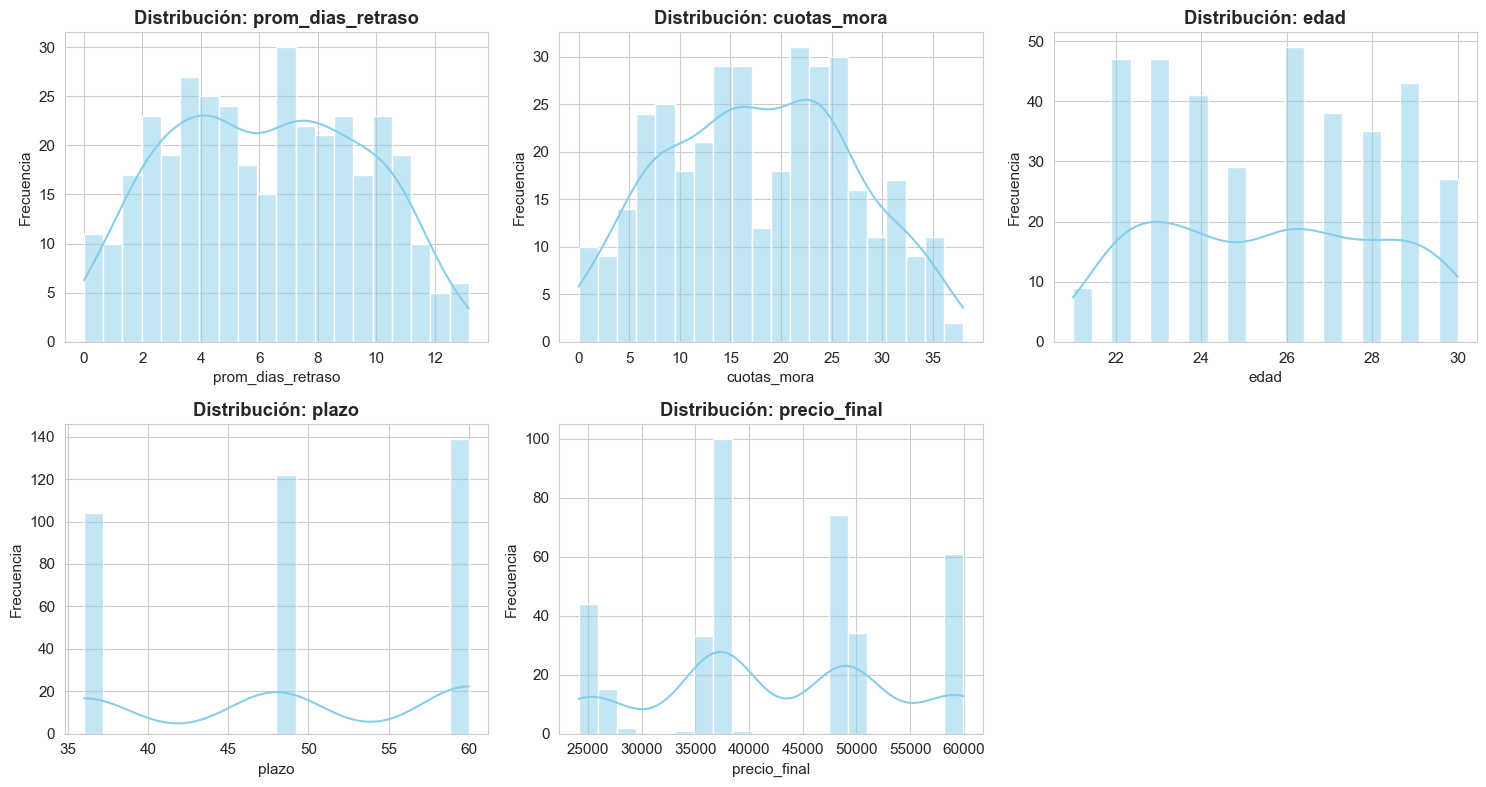

In [11]:
# Distribuciones de variables numéricas clave
# Numero de contratos no aporta valor predictivo, por lo que no se incluye
key_vars = [
    "prom_dias_retraso",
    "cuotas_mora",
    "edad",
    "plazo",
    "precio_final",
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, var in enumerate(key_vars):
    sns.histplot(data=df, x=var, kde=True, ax=axes[i], color="skyblue", bins=20)
    axes[i].set_title(f"Distribución: {var}", fontweight="bold")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frecuencia")

# Ocultar el último subplot vacío
axes[-1].axis("off")

plt.tight_layout()
plt.show()

### 4.7. Análisis Bivariado

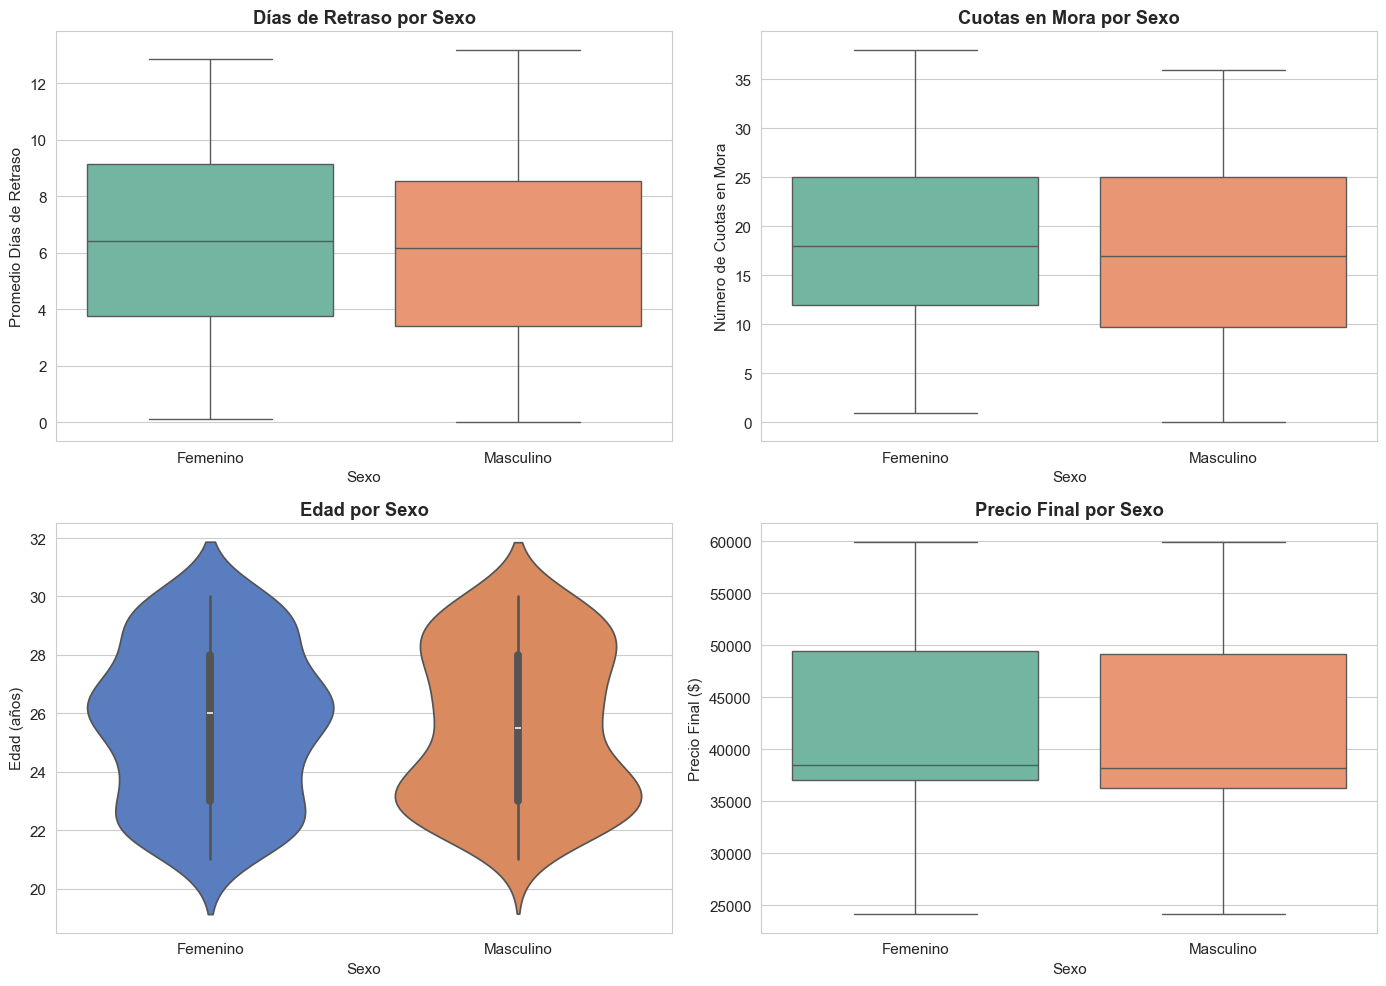

In [12]:
# Variables numéricas por sexo
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Días de retraso por sexo
sns.boxplot(data=df, x="sexo", y="prom_dias_retraso", palette="Set2", ax=axes[0, 0])
axes[0, 0].set_title("Días de Retraso por Sexo", fontweight="bold")
axes[0, 0].set_xlabel("Sexo")
axes[0, 0].set_ylabel("Promedio Días de Retraso")

# Cuotas en mora por sexo
sns.boxplot(data=df, x="sexo", y="cuotas_mora", palette="Set2", ax=axes[0, 1])
axes[0, 1].set_title("Cuotas en Mora por Sexo", fontweight="bold")
axes[0, 1].set_xlabel("Sexo")
axes[0, 1].set_ylabel("Número de Cuotas en Mora")

# Edad por sexo
sns.violinplot(data=df, x="sexo", y="edad", palette="muted", ax=axes[1, 0])
axes[1, 0].set_title("Edad por Sexo", fontweight="bold")
axes[1, 0].set_xlabel("Sexo")
axes[1, 0].set_ylabel("Edad (años)")

# Precio final por sexo
sns.boxplot(data=df, x="sexo", y="precio_final", palette="Set2", ax=axes[1, 1])
axes[1, 1].set_title("Precio Final por Sexo", fontweight="bold")
axes[1, 1].set_xlabel("Sexo")
axes[1, 1].set_ylabel("Precio Final ($)")

plt.tight_layout()
plt.show()

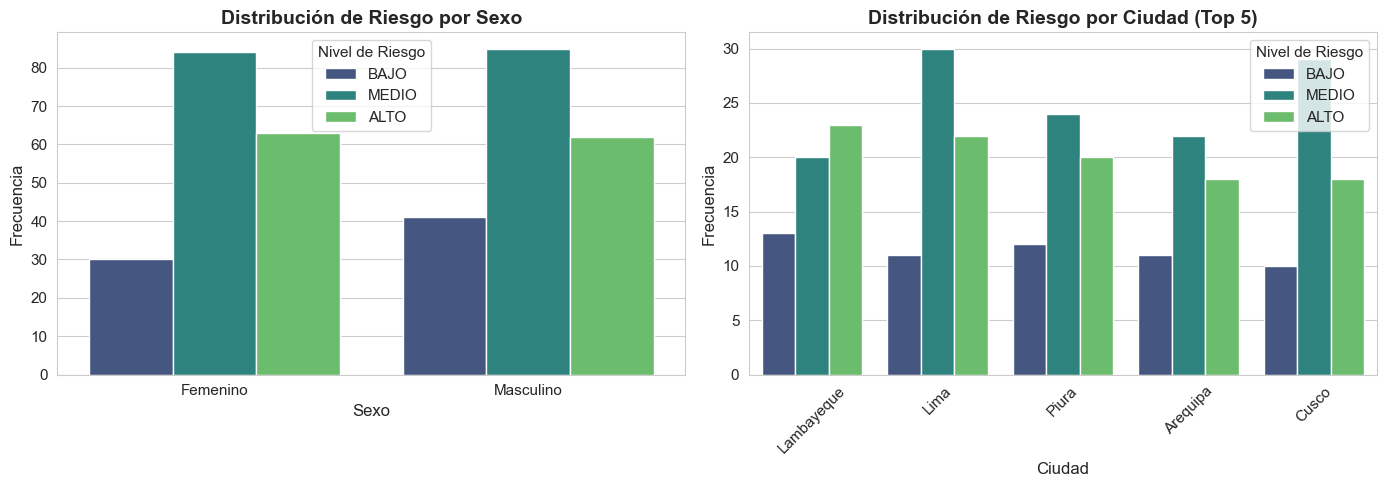

In [13]:
# Análisis de riesgo por variables demográficas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Riesgo por sexo
sns.countplot(
    data=df,
    x="sexo",
    hue="riesgo",
    hue_order=["BAJO", "MEDIO", "ALTO"],
    palette="viridis",
    ax=axes[0],
)
axes[0].set_title("Distribución de Riesgo por Sexo", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Sexo", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
axes[0].legend(title="Nivel de Riesgo")

# Riesgo por ciudad (top 5 ciudades)
top_cities = df["ciudad"].value_counts().head(5).index
df_top_cities = df[df["ciudad"].isin(top_cities)]
sns.countplot(
    data=df_top_cities,
    x="ciudad",
    hue="riesgo",
    hue_order=["BAJO", "MEDIO", "ALTO"],
    palette="viridis",
    ax=axes[1],
)
axes[1].set_title(
    "Distribución de Riesgo por Ciudad (Top 5)", fontsize=14, fontweight="bold"
)
axes[1].set_xlabel("Ciudad", fontsize=12)
axes[1].set_ylabel("Frecuencia", fontsize=12)
axes[1].legend(title="Nivel de Riesgo")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

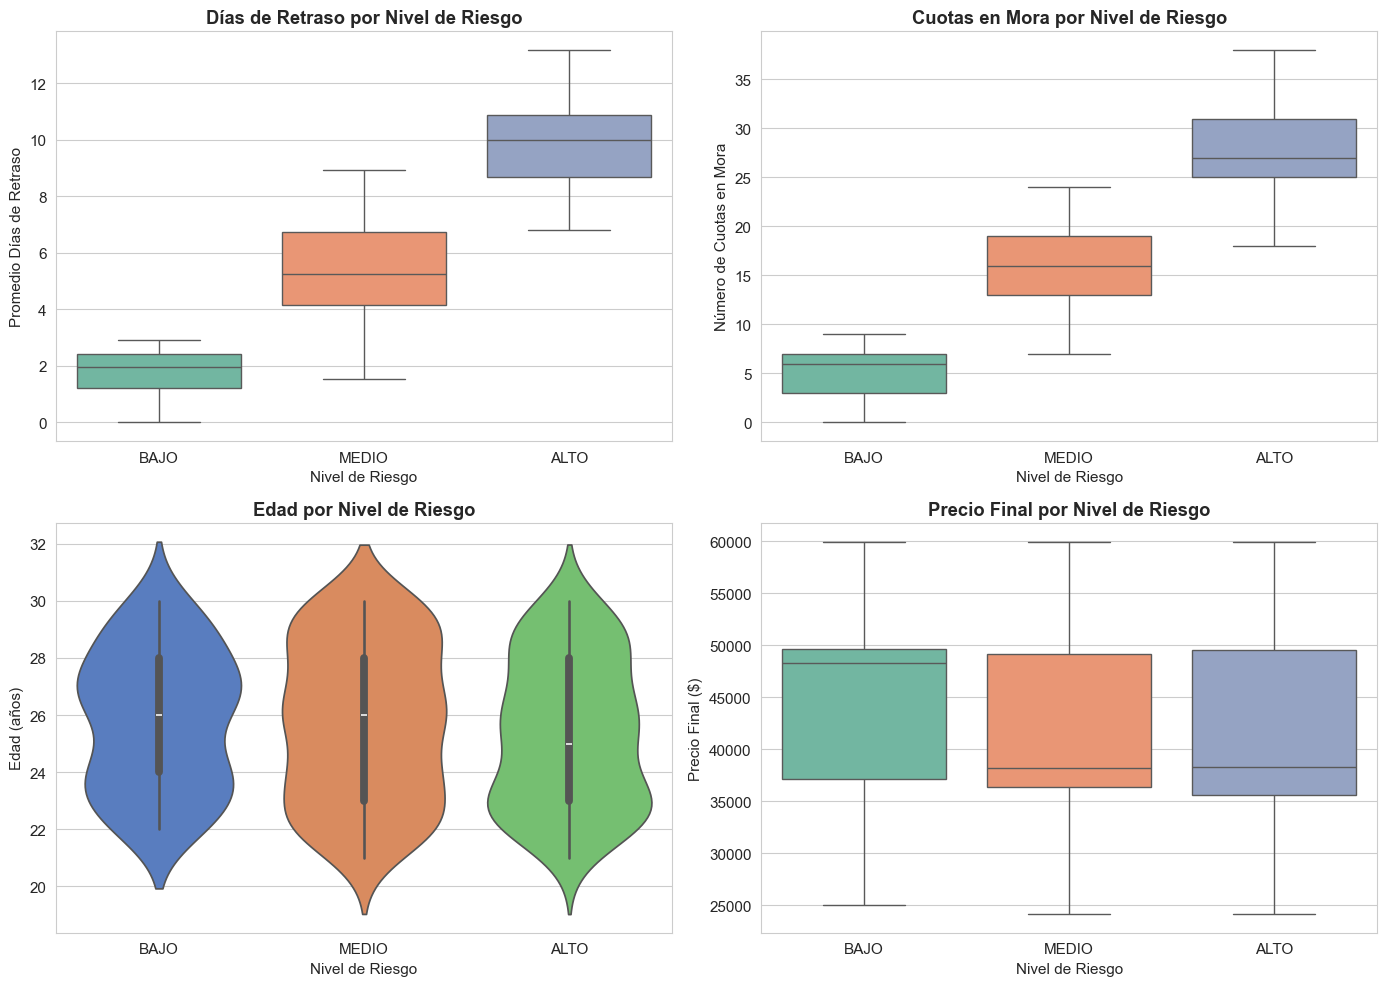

In [14]:
# Análisis de variables clave vs riesgo
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Días de retraso por riesgo
sns.boxplot(
    data=df,
    x="riesgo",
    y="prom_dias_retraso",
    order=["BAJO", "MEDIO", "ALTO"],
    palette="Set2",
    ax=axes[0, 0],
)
axes[0, 0].set_title("Días de Retraso por Nivel de Riesgo", fontweight="bold")
axes[0, 0].set_xlabel("Nivel de Riesgo")
axes[0, 0].set_ylabel("Promedio Días de Retraso")

# Cuotas en mora por riesgo
sns.boxplot(
    data=df,
    x="riesgo",
    y="cuotas_mora",
    order=["BAJO", "MEDIO", "ALTO"],
    palette="Set2",
    ax=axes[0, 1],
)
axes[0, 1].set_title("Cuotas en Mora por Nivel de Riesgo", fontweight="bold")
axes[0, 1].set_xlabel("Nivel de Riesgo")
axes[0, 1].set_ylabel("Número de Cuotas en Mora")

# Edad por riesgo
sns.violinplot(
    data=df,
    x="riesgo",
    y="edad",
    order=["BAJO", "MEDIO", "ALTO"],
    palette="muted",
    ax=axes[1, 0],
)
axes[1, 0].set_title("Edad por Nivel de Riesgo", fontweight="bold")
axes[1, 0].set_xlabel("Nivel de Riesgo")
axes[1, 0].set_ylabel("Edad (años)")

# Precio final por riesgo
sns.boxplot(
    data=df,
    x="riesgo",
    y="precio_final",
    order=["BAJO", "MEDIO", "ALTO"],
    palette="Set2",
    ax=axes[1, 1],
)
axes[1, 1].set_title("Precio Final por Nivel de Riesgo", fontweight="bold")
axes[1, 1].set_xlabel("Nivel de Riesgo")
axes[1, 1].set_ylabel("Precio Final ($)")

plt.tight_layout()
plt.show()

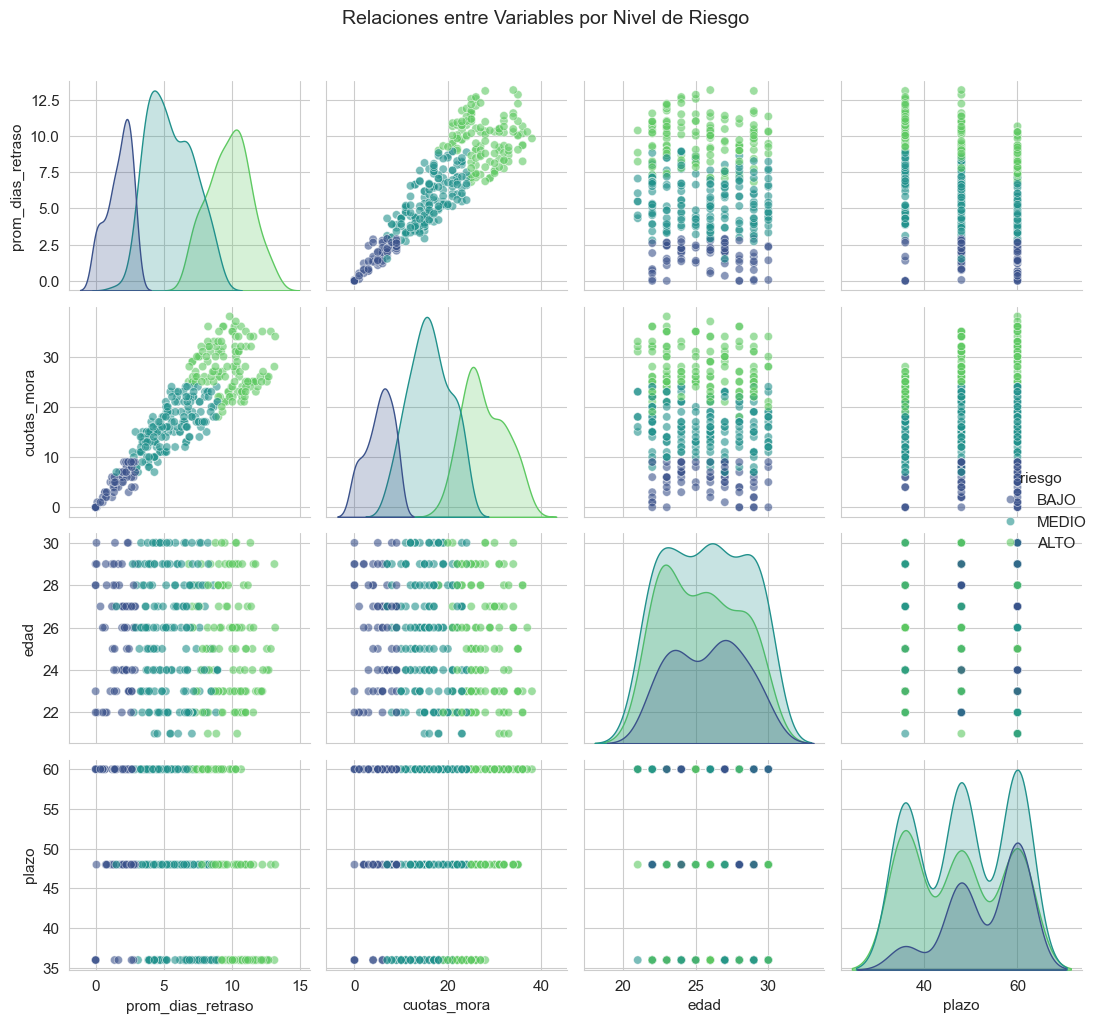

In [15]:
# Pairplot para visualizar relaciones entre variables clave
plot_vars = ["prom_dias_retraso", "cuotas_mora", "edad", "plazo", "riesgo"]

pairplot = sns.pairplot(
    df[plot_vars],
    hue="riesgo",
    palette="viridis",
    diag_kind="kde",
    plot_kws={"alpha": 0.6},
    height=2.5,
)
pairplot.fig.suptitle(
    "Relaciones entre Variables por Nivel de Riesgo", y=1.02, fontsize=14
)
plt.tight_layout()
plt.show()

# 5. Manipulación y Preparación de Datos

### 5.1. Definición de Features y Target


In [16]:
X = df.drop("riesgo", axis=1)
y = df["riesgo"]

### 5.2. División Train-Test


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (292, 8)
Test: (73, 8)


### 5.3. Encoding de Variables Categóricas


In [18]:
encoder = ce.OrdinalEncoder(cols=["sexo", "ciudad"])

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

X_train_encoded.head()

,num_contratos,prom_dias_retraso,cuotas_mora,edad,plazo,precio_final,sexo,ciudad
230,1,9.00,22,28,36,37674.52,1,1
251,1,7.83,17,28,36,48222.87,1,2
78,1,1.94,5,26,48,48282.52,2,2
119,1,1.45,5,27,60,58764.04,1,3
92,1,13.11,28,29,36,38308.05,2,1


### 5.4. Escalado de Features


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

print_title("ESCALADO DE FEATURES (StandardScaler)")

print("\n✅ Features escaladas exitosamente")
print(f"\nMedia después del escalado (train): {X_train_scaled.mean().mean():.2f}")
print(
    f"Desviación estándar después del escalado (train): {X_train_scaled.std().mean():.2f}"
)

print("\nPrimeras filas de X_train_scaled:")
X_train_scaled.head()

ESCALADO DE FEATURES (StandardScaler)

✅ Features escaladas exitosamente

Media después del escalado (train): -0.00
Desviación estándar después del escalado (train): 1.00

Primeras filas de X_train_scaled:


,num_contratos,prom_dias_retraso,cuotas_mora,edad,plazo,precio_final,sexo,ciudad
0,-0.083045,0.835557,0.437948,0.911550,-1.323576,-0.404184,-1.013794,-1.448298
1,-0.083045,0.480503,-0.105763,0.911550,-1.323576,0.554156,-1.013794,-0.938776
2,-0.083045,-1.306905,-1.410668,0.155378,-0.108217,0.559575,0.986394,-0.938776
3,-0.083045,-1.455603,-1.410668,0.533464,1.107142,1.511844,-1.013794,-0.429255
4,-0.083045,2.082798,1.090400,1.289636,-1.323576,-0.346627,0.986394,-1.448298


### 5.5. Encoding de Variable Objetivo

In [20]:
print_title("ENCODING DE VARIABLE OBJETIVO")

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
class_names_ordered = list(label_encoder.classes_)

print("\nMapeo de encoding para 'riesgo':")
print("-" * 40)

for encoded_val, original_label in enumerate(class_names_ordered):
    count_train = (y_train_encoded == encoded_val).sum()
    count_test = (y_test_encoded == encoded_val).sum()
    print(
        f"{encoded_val} → {original_label:6s}  (train={count_train:3d}, test={count_test:2d})"
    )

print(f"\nClases ordenadas para visualizaciones: {class_names_ordered}")

ENCODING DE VARIABLE OBJETIVO

Mapeo de encoding para 'riesgo':
----------------------------------------
0 → ALTO    (train=100, test=25)
1 → BAJO    (train= 57, test=14)
2 → MEDIO   (train=135, test=34)

Clases ordenadas para visualizaciones: ['ALTO', 'BAJO', 'MEDIO']


### 5.6. Balanceo con SMOTE


In [21]:
print_title("BALANCEO DE CLASES CON SMOTE")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_encoded)

print("\nDistribución ANTES de SMOTE:")
unique, counts = np.unique(y_train_encoded, return_counts=True)
for val, count in zip(unique, counts):
    print(f"  {class_names_ordered[val]:6s}: {count:3d} muestras")

print("\nDistribución DESPUÉS de SMOTE:")
unique_smote, counts_smote = np.unique(y_train_smote, return_counts=True)
for val, count in zip(unique_smote, counts_smote):
    print(f"  {class_names_ordered[val]:6s}: {count:3d} muestras")

print(f"\n✅ Dataset balanceado. Total de muestras train: {len(y_train_smote)}")

BALANCEO DE CLASES CON SMOTE

Distribución ANTES de SMOTE:
  ALTO  : 100 muestras
  BAJO  :  57 muestras
  MEDIO : 135 muestras

Distribución DESPUÉS de SMOTE:
  ALTO  : 135 muestras
  BAJO  : 135 muestras
  MEDIO : 135 muestras

✅ Dataset balanceado. Total de muestras train: 405


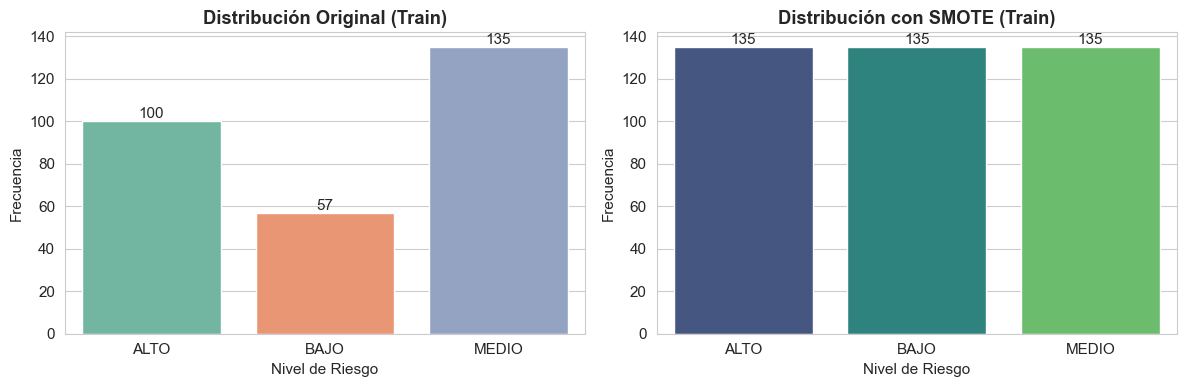

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Antes de SMOTE
before_df = pd.DataFrame(
    {"Clase": [class_names_ordered[i] for i in unique], "Frecuencia": counts}
)
sns.barplot(data=before_df, x="Clase", y="Frecuencia", ax=axes[0], palette="Set2")
axes[0].set_title("Distribución Original (Train)", fontweight="bold")
axes[0].set_xlabel("Nivel de Riesgo")
axes[0].set_ylabel("Frecuencia")
for container in axes[0].containers:
    axes[0].bar_label(container)

# Después de SMOTE
after_df = pd.DataFrame(
    {
        "Clase": [class_names_ordered[i] for i in unique_smote],
        "Frecuencia": counts_smote,
    }
)
sns.barplot(data=after_df, x="Clase", y="Frecuencia", ax=axes[1], palette="viridis")
axes[1].set_title("Distribución con SMOTE (Train)", fontweight="bold")
axes[1].set_xlabel("Nivel de Riesgo")
axes[1].set_ylabel("Frecuencia")
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

# 6. Modelamiento

### 6.1. Modelos Supervisados

#### 6.1.1. Decision Tree - Gini

In [23]:
print_title("DECISION TREE - GINI")

clf_gini = DecisionTreeClassifier(
    criterion="gini", max_depth=5, random_state=42, min_samples_split=20
)

# Entrenar SIN SMOTE
clf_gini.fit(X_train_scaled, y_train_encoded)
y_pred_gini = clf_gini.predict(X_test_scaled)
y_train_pred_gini = clf_gini.predict(X_train_scaled)
train_acc_gini = accuracy_score(y_train_encoded, y_train_pred_gini)
test_acc_gini = accuracy_score(y_test_encoded, y_pred_gini)

# Entrenar CON SMOTE
clf_gini_smote = DecisionTreeClassifier(
    criterion="gini", max_depth=5, random_state=42, min_samples_split=20
)
clf_gini_smote.fit(X_train_smote, y_train_smote)
y_pred_gini_smote = clf_gini_smote.predict(X_test_scaled)
y_train_pred_gini_smote = clf_gini_smote.predict(X_train_scaled)
train_acc_gini_smote = accuracy_score(y_train_encoded, y_train_pred_gini_smote)
test_acc_gini_smote = accuracy_score(y_test_encoded, y_pred_gini_smote)

print("\n📊 RESULTADOS SIN SMOTE:")
print(f"Train Accuracy: {train_acc_gini:.4f}")
print(f"Test Accuracy:  {test_acc_gini:.4f}")
print(f"Diferencia:     {abs(train_acc_gini - test_acc_gini):.4f}")

print("\n📊 RESULTADOS CON SMOTE:")
print(f"Train Accuracy: {train_acc_gini_smote:.4f}")
print(f"Test Accuracy:  {test_acc_gini_smote:.4f}")
print(f"Diferencia:     {abs(train_acc_gini_smote - test_acc_gini_smote):.4f}")

DECISION TREE - GINI

📊 RESULTADOS SIN SMOTE:
Train Accuracy: 1.0000
Test Accuracy:  0.9863
Diferencia:     0.0137

📊 RESULTADOS CON SMOTE:
Train Accuracy: 1.0000
Test Accuracy:  0.9863
Diferencia:     0.0137


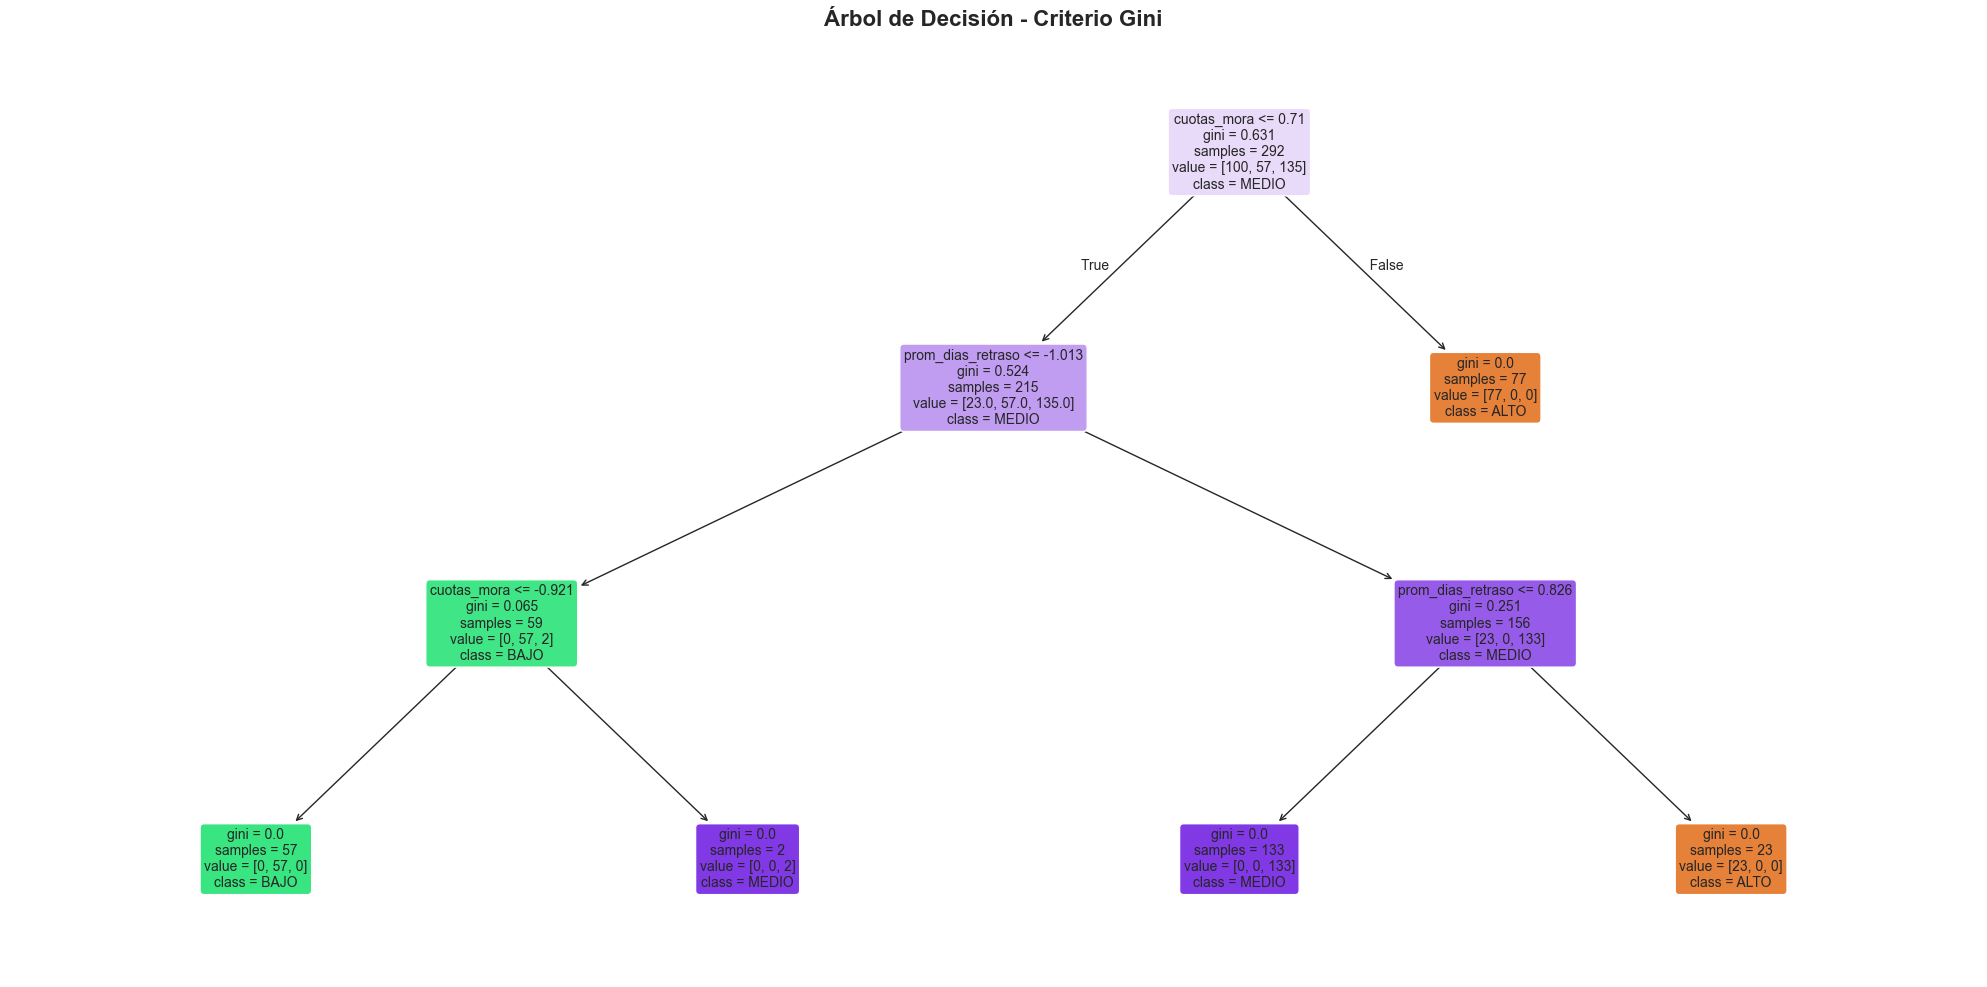

In [24]:
# Visualización del árbol de decisión Gini
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf_gini,
    feature_names=X_train_scaled.columns,
    class_names=class_names_ordered,
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title("Árbol de Decisión - Criterio Gini", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

#### 6.1.2. Decision Tree - Entropy

In [25]:
print_title("DECISION TREE - ENTROPY")

clf_entropy = DecisionTreeClassifier(
    criterion="entropy", max_depth=5, random_state=42, min_samples_split=20
)

# Entrenar SIN SMOTE
clf_entropy.fit(X_train_scaled, y_train_encoded)
y_pred_entropy = clf_entropy.predict(X_test_scaled)
y_train_pred_entropy = clf_entropy.predict(X_train_scaled)
train_acc_entropy = accuracy_score(y_train_encoded, y_train_pred_entropy)
test_acc_entropy = accuracy_score(y_test_encoded, y_pred_entropy)

# Entrenar CON SMOTE
clf_entropy_smote = DecisionTreeClassifier(
    criterion="entropy", max_depth=5, random_state=42, min_samples_split=20
)
clf_entropy_smote.fit(X_train_smote, y_train_smote)
y_pred_entropy_smote = clf_entropy_smote.predict(X_test_scaled)
y_train_pred_entropy_smote = clf_entropy_smote.predict(X_train_scaled)
train_acc_entropy_smote = accuracy_score(y_train_encoded, y_train_pred_entropy_smote)
test_acc_entropy_smote = accuracy_score(y_test_encoded, y_pred_entropy_smote)

print("\n📊 RESULTADOS SIN SMOTE:")
print(f"Train Accuracy: {train_acc_entropy:.4f}")
print(f"Test Accuracy:  {test_acc_entropy:.4f}")
print(f"Diferencia:     {abs(train_acc_entropy - test_acc_entropy):.4f}")

print("\n📊 RESULTADOS CON SMOTE:")
print(f"Train Accuracy: {train_acc_entropy_smote:.4f}")
print(f"Test Accuracy:  {test_acc_entropy_smote:.4f}")
print(f"Diferencia:     {abs(train_acc_entropy_smote - test_acc_entropy_smote):.4f}")

DECISION TREE - ENTROPY

📊 RESULTADOS SIN SMOTE:
Train Accuracy: 1.0000
Test Accuracy:  0.9863
Diferencia:     0.0137

📊 RESULTADOS CON SMOTE:
Train Accuracy: 1.0000
Test Accuracy:  0.9863
Diferencia:     0.0137


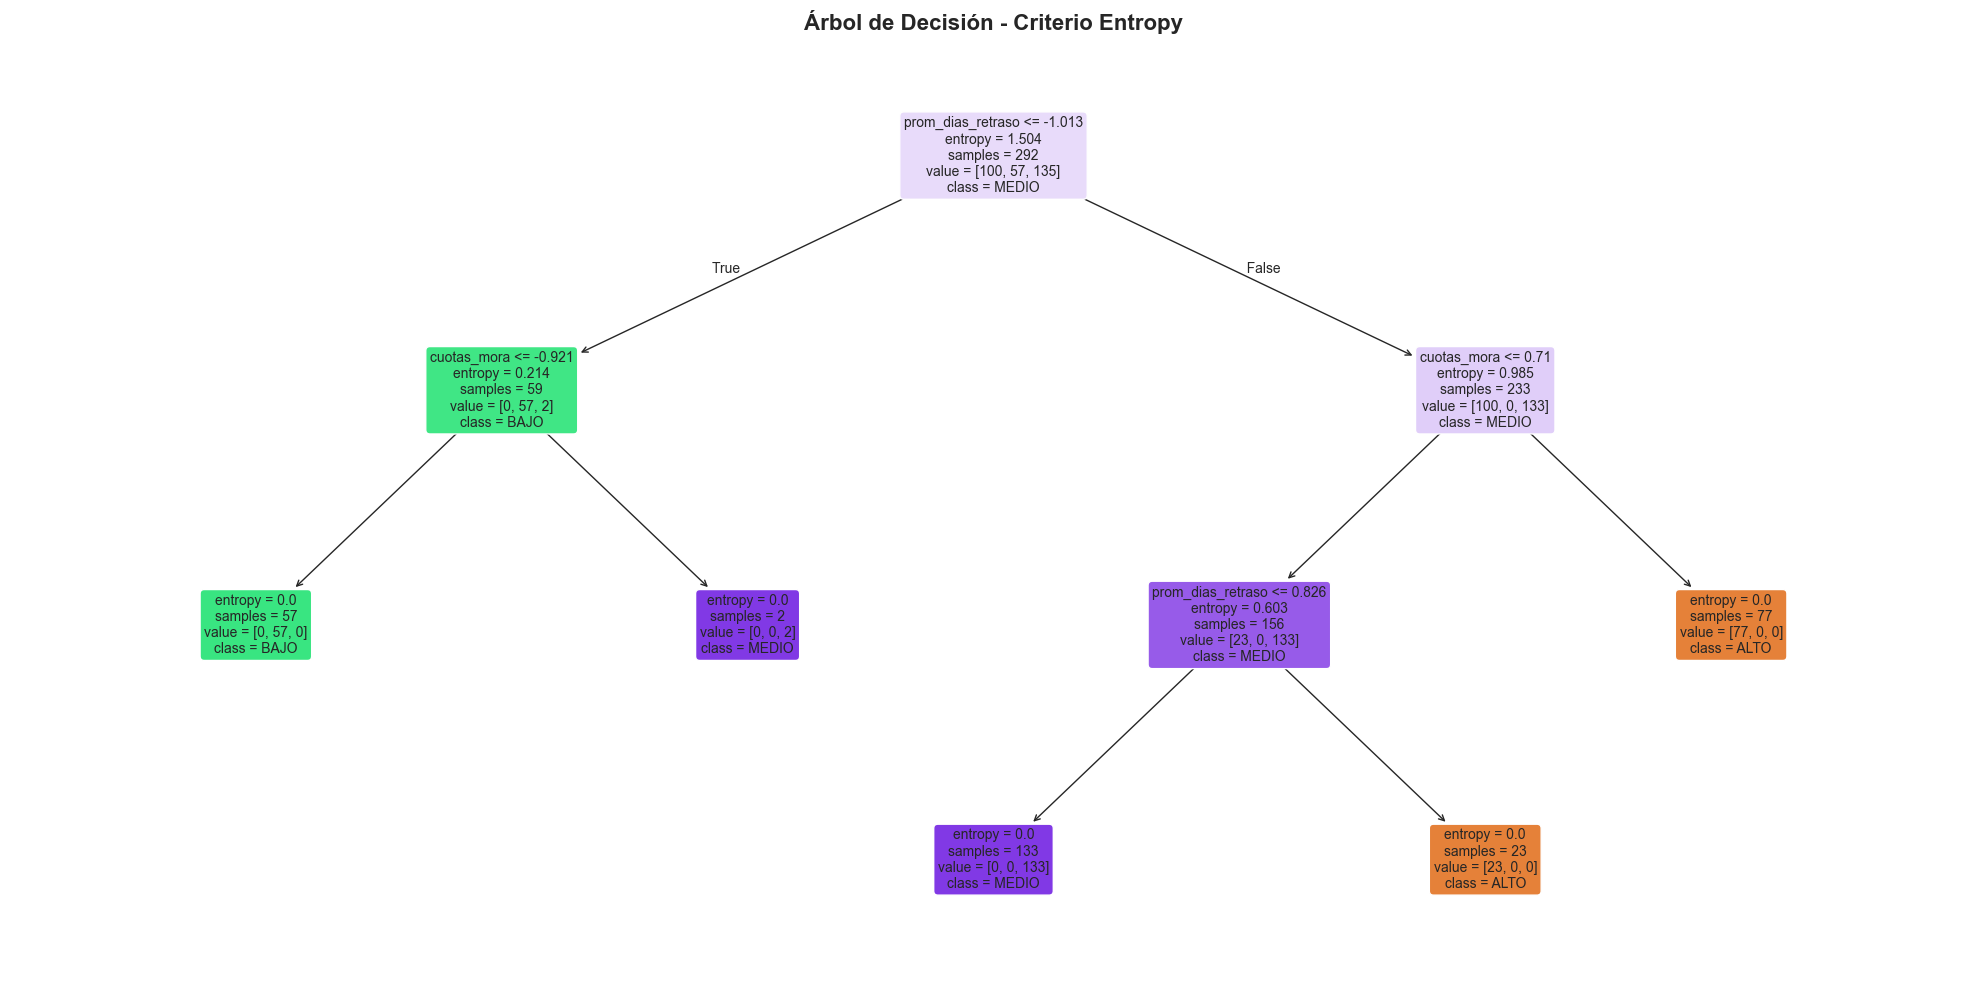

In [26]:
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf_entropy,
    feature_names=X_train_scaled.columns,
    class_names=class_names_ordered,
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title("Árbol de Decisión - Criterio Entropy", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

#### 6.1.3. Random Forest

In [27]:
print_title("RANDOM FOREST")

clf_rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Entrenar SIN SMOTE
clf_rf.fit(X_train_scaled, y_train_encoded)
y_pred_rf = clf_rf.predict(X_test_scaled)
y_train_pred_rf = clf_rf.predict(X_train_scaled)
train_acc_rf = accuracy_score(y_train_encoded, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test_encoded, y_pred_rf)

# Entrenar CON SMOTE
clf_rf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
clf_rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = clf_rf_smote.predict(X_test_scaled)
y_train_pred_rf_smote = clf_rf_smote.predict(X_train_scaled)
train_acc_rf_smote = accuracy_score(y_train_encoded, y_train_pred_rf_smote)
test_acc_rf_smote = accuracy_score(y_test_encoded, y_pred_rf_smote)

print(f"\nN° de estimadores: {clf_rf.n_estimators}")
print("\n📊 RESULTADOS SIN SMOTE:")
print(f"Train Accuracy: {train_acc_rf:.4f}")
print(f"Test Accuracy:  {test_acc_rf:.4f}")
print(f"Diferencia:     {abs(train_acc_rf - test_acc_rf):.4f}")

print("\n📊 RESULTADOS CON SMOTE:")
print(f"Train Accuracy: {train_acc_rf_smote:.4f}")
print(f"Test Accuracy:  {test_acc_rf_smote:.4f}")
print(f"Diferencia:     {abs(train_acc_rf_smote - test_acc_rf_smote):.4f}")

RANDOM FOREST

N° de estimadores: 200

📊 RESULTADOS SIN SMOTE:
Train Accuracy: 1.0000
Test Accuracy:  0.9863
Diferencia:     0.0137

📊 RESULTADOS CON SMOTE:
Train Accuracy: 1.0000
Test Accuracy:  0.9863
Diferencia:     0.0137


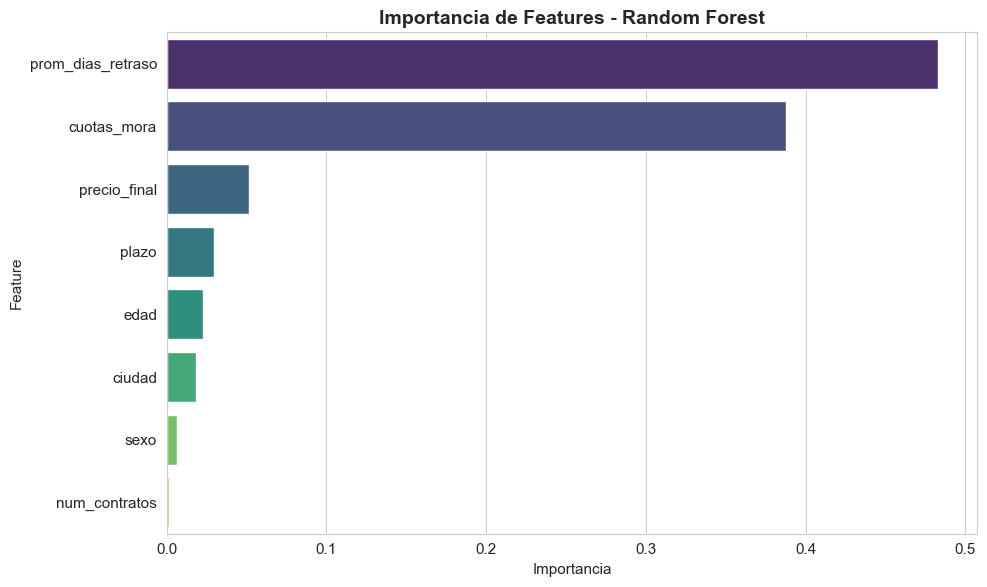

Importancia de Features (Random Forest):
          Feature  Importancia
prom_dias_retraso     0.483135
      cuotas_mora     0.387509
     precio_final     0.051535
            plazo     0.029489
             edad     0.022583
           ciudad     0.018261
             sexo     0.006363
    num_contratos     0.001126


In [28]:
feature_importance_rf = pd.DataFrame(
    {"Feature": X_train_scaled.columns, "Importancia": clf_rf.feature_importances_}
).sort_values("Importancia", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_rf, x="Importancia", y="Feature", palette="viridis")
plt.title("Importancia de Features - Random Forest", fontsize=14, fontweight="bold")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print_title("Importancia de Features (Random Forest):")
print(feature_importance_rf.to_string(index=False))

#### 6.1.4. XGBoost

In [29]:
print_title("XGBOOST")

clf_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    eval_metric="mlogloss",
)

# Entrenar SIN SMOTE
clf_xgb.fit(X_train_scaled, y_train_encoded)
y_pred_xgb = clf_xgb.predict(X_test_scaled)
y_train_pred_xgb = clf_xgb.predict(X_train_scaled)
train_acc_xgb = accuracy_score(y_train_encoded, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test_encoded, y_pred_xgb)

# Entrenar CON SMOTE
clf_xgb_smote = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    eval_metric="mlogloss",
)
clf_xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = clf_xgb_smote.predict(X_test_scaled)
y_train_pred_xgb_smote = clf_xgb_smote.predict(X_train_scaled)
train_acc_xgb_smote = accuracy_score(y_train_encoded, y_train_pred_xgb_smote)
test_acc_xgb_smote = accuracy_score(y_test_encoded, y_pred_xgb_smote)

print(f"\nN° de estimadores: {clf_xgb.n_estimators}")
print(f"Learning rate: {clf_xgb.learning_rate}")
print("\n📊 RESULTADOS SIN SMOTE:")
print(f"Train Accuracy: {train_acc_xgb:.4f}")
print(f"Test Accuracy:  {test_acc_xgb:.4f}")
print(f"Diferencia:     {abs(train_acc_xgb - test_acc_xgb):.4f}")

print("\n📊 RESULTADOS CON SMOTE:")
print(f"Train Accuracy: {train_acc_xgb_smote:.4f}")
print(f"Test Accuracy:  {test_acc_xgb_smote:.4f}")
print(f"Diferencia:     {abs(train_acc_xgb_smote - test_acc_xgb_smote):.4f}")

XGBOOST

N° de estimadores: 300
Learning rate: 0.05

📊 RESULTADOS SIN SMOTE:
Train Accuracy: 1.0000
Test Accuracy:  0.9863
Diferencia:     0.0137

📊 RESULTADOS CON SMOTE:
Train Accuracy: 1.0000
Test Accuracy:  0.9726
Diferencia:     0.0274


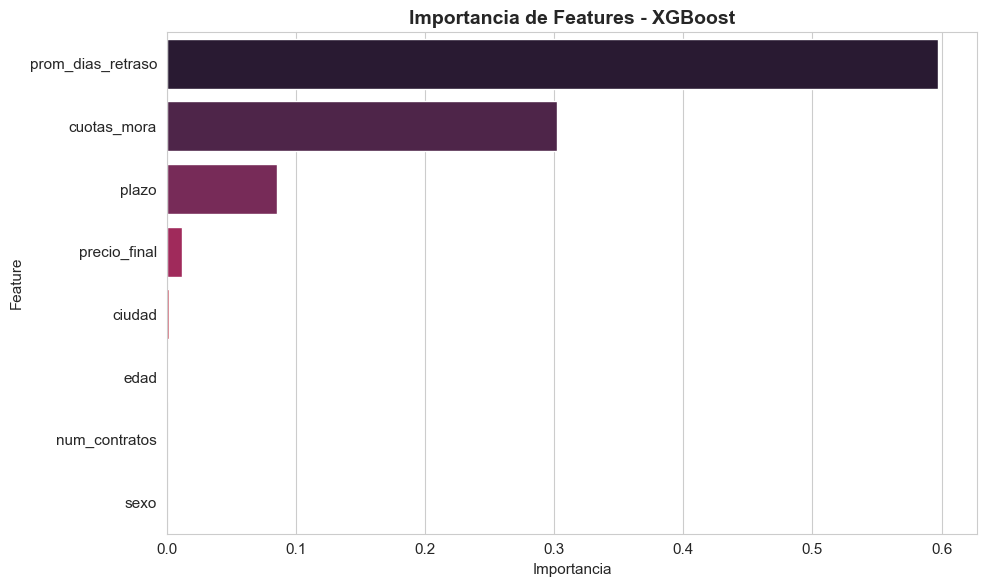

Importancia de Features (XGBoost):
          Feature  Importancia
prom_dias_retraso     0.597553
      cuotas_mora     0.302533
            plazo     0.085557
     precio_final     0.011582
           ciudad     0.001902
             edad     0.000873
    num_contratos     0.000000
             sexo     0.000000


In [30]:
feature_importance_xgb = pd.DataFrame(
    {"Feature": X_train_scaled.columns, "Importancia": clf_xgb.feature_importances_}
).sort_values("Importancia", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_xgb, x="Importancia", y="Feature", palette="rocket")
plt.title("Importancia de Features - XGBoost", fontsize=14, fontweight="bold")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print_title("Importancia de Features (XGBoost):")
print(feature_importance_xgb.to_string(index=False))

#### 6.1.5. Regresión Logística

In [31]:
print_title("REGRESIÓN LOGÍSTICA")

clf_logistic = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar SIN SMOTE
clf_logistic.fit(X_train_scaled, y_train_encoded)
y_pred_logistic = clf_logistic.predict(X_test_scaled)
y_train_pred_logistic = clf_logistic.predict(X_train_scaled)
train_acc_logistic = accuracy_score(y_train_encoded, y_train_pred_logistic)
test_acc_logistic = accuracy_score(y_test_encoded, y_pred_logistic)

# Entrenar CON SMOTE
clf_logistic_smote = LogisticRegression(max_iter=1000, random_state=42)
clf_logistic_smote.fit(X_train_smote, y_train_smote)
y_pred_logistic_smote = clf_logistic_smote.predict(X_test_scaled)
y_train_pred_logistic_smote = clf_logistic_smote.predict(X_train_scaled)
train_acc_logistic_smote = accuracy_score(y_train_encoded, y_train_pred_logistic_smote)
test_acc_logistic_smote = accuracy_score(y_test_encoded, y_pred_logistic_smote)

print("\n📊 RESULTADOS SIN SMOTE:")
print(f"Train Accuracy: {train_acc_logistic:.4f}")
print(f"Test Accuracy:  {test_acc_logistic:.4f}")
print(f"Diferencia:     {abs(train_acc_logistic - test_acc_logistic):.4f}")

print("\n📊 RESULTADOS CON SMOTE:")
print(f"Train Accuracy: {train_acc_logistic_smote:.4f}")
print(f"Test Accuracy:  {test_acc_logistic_smote:.4f}")
print(f"Diferencia:     {abs(train_acc_logistic_smote - test_acc_logistic_smote):.4f}")

REGRESIÓN LOGÍSTICA

📊 RESULTADOS SIN SMOTE:
Train Accuracy: 0.9623
Test Accuracy:  0.9315
Diferencia:     0.0308

📊 RESULTADOS CON SMOTE:
Train Accuracy: 0.9589
Test Accuracy:  0.9452
Diferencia:     0.0137


### 6.2. Modelos No Supervisados

#### 6.2.1. K-Means Clustering

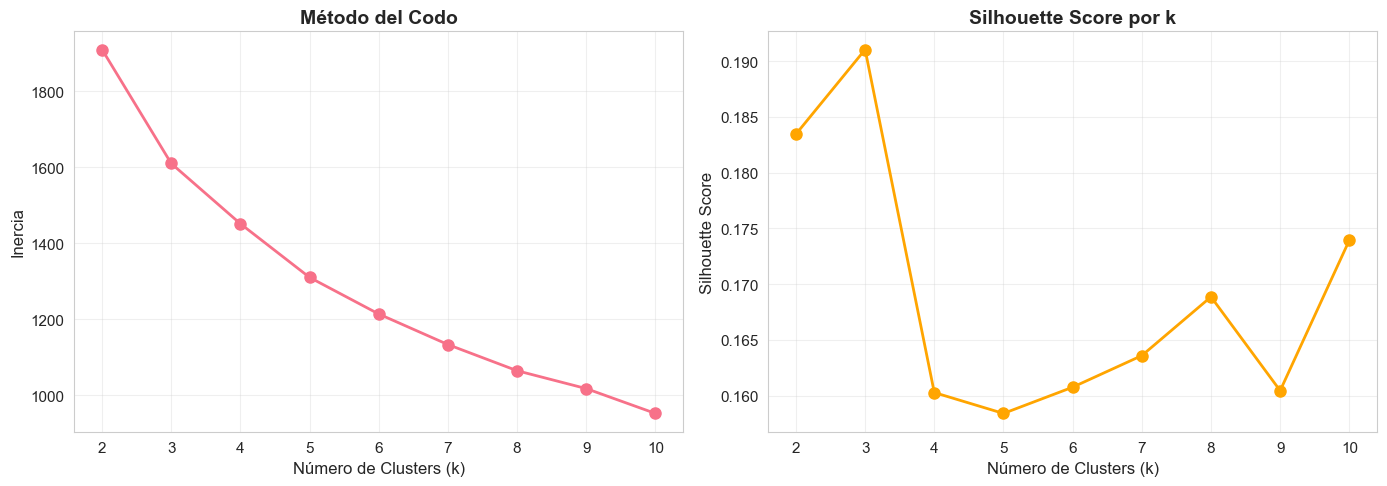


📊 K óptimo según Silhouette Score: 3
   Silhouette Score: 0.1910


In [32]:
inertias = []
silhouette_scores = []
kmeans_models = {}
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))
    kmeans_models[k] = kmeans

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de inercia
axes[0].plot(k_range, inertias, marker="o", linewidth=2, markersize=8)
axes[0].set_xlabel("Número de Clusters (k)", fontsize=12)
axes[0].set_ylabel("Inercia", fontsize=12)
axes[0].set_title("Método del Codo", fontsize=14, fontweight="bold")
axes[0].grid(True, alpha=0.3)

# Gráfico de Silhouette Score
axes[1].plot(
    k_range, silhouette_scores, marker="o", linewidth=2, markersize=8, color="orange"
)
axes[1].set_xlabel("Número de Clusters (k)", fontsize=12)
axes[1].set_ylabel("Silhouette Score", fontsize=12)
axes[1].set_title("Silhouette Score por k", fontsize=14, fontweight="bold")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\n📊 K óptimo según Silhouette Score: {optimal_k}")
print(f"   Silhouette Score: {max(silhouette_scores):.4f}")

In [33]:
print_title("K-MEANS CLUSTERING (k=3)")

# Instanciar y entrenar K-Means con k=3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_train = kmeans_final.fit_predict(X_train_scaled)
clusters_test = kmeans_final.predict(X_test_scaled)

print(f"\nSilhouette Score: {silhouette_score(X_train_scaled, clusters_train):.4f}")
print(f"Inercia: {kmeans_final.inertia_:.2f}")

print("\nDistribución de clusters en train:")
unique_clusters, counts_clusters = np.unique(clusters_train, return_counts=True)
for cluster, count in zip(unique_clusters, counts_clusters):
    print(
        f"  Cluster {cluster}: {count} muestras ({count / len(clusters_train) * 100:.1f}%)"
    )

K-MEANS CLUSTERING (k=3)

Silhouette Score: 0.1910
Inercia: 1609.63

Distribución de clusters en train:
  Cluster 0: 156 muestras (53.4%)
  Cluster 1: 134 muestras (45.9%)
  Cluster 2: 2 muestras (0.7%)


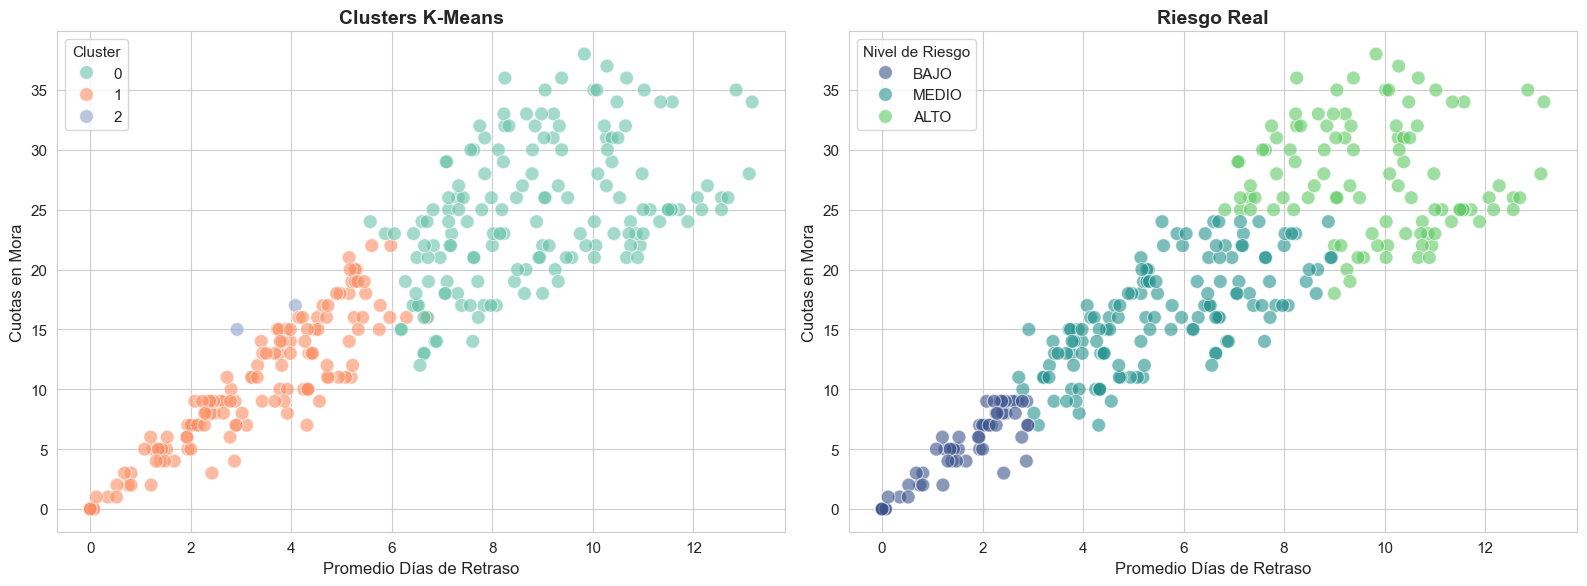


📊 Visualización basada en las 2 variables más importantes:
   - prom_dias_retraso (mayor importancia)
   - cuotas_mora (segunda mayor importancia)


In [34]:
# Visualización de clusters usando las variables más importantes
# Crear DataFrame con las variables clave del train set original
cluster_df = pd.DataFrame(
    {
        "prom_dias_retraso": X_train["prom_dias_retraso"].values,
        "cuotas_mora": X_train["cuotas_mora"].values,
        "Cluster": clusters_train,
        "Riesgo_Real": y_train.values,
    }
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Clusters según K-Means
sns.scatterplot(
    data=cluster_df,
    x="prom_dias_retraso",
    y="cuotas_mora",
    hue="Cluster",
    palette="Set2",
    s=100,
    alpha=0.6,
    ax=axes[0],
)
axes[0].set_title("Clusters K-Means", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Promedio Días de Retraso", fontsize=12)
axes[0].set_ylabel("Cuotas en Mora", fontsize=12)
axes[0].legend(title="Cluster")

# Gráfico 2: Riesgo Real
sns.scatterplot(
    data=cluster_df,
    x="prom_dias_retraso",
    y="cuotas_mora",
    hue="Riesgo_Real",
    hue_order=["BAJO", "MEDIO", "ALTO"],
    palette="viridis",
    s=100,
    alpha=0.6,
    ax=axes[1],
)
axes[1].set_title("Riesgo Real", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Promedio Días de Retraso", fontsize=12)
axes[1].set_ylabel("Cuotas en Mora", fontsize=12)
axes[1].legend(title="Nivel de Riesgo")

plt.tight_layout()
plt.show()

print("\n📊 Visualización basada en las 2 variables más importantes:")
print("   - prom_dias_retraso (mayor importancia)")
print("   - cuotas_mora (segunda mayor importancia)")

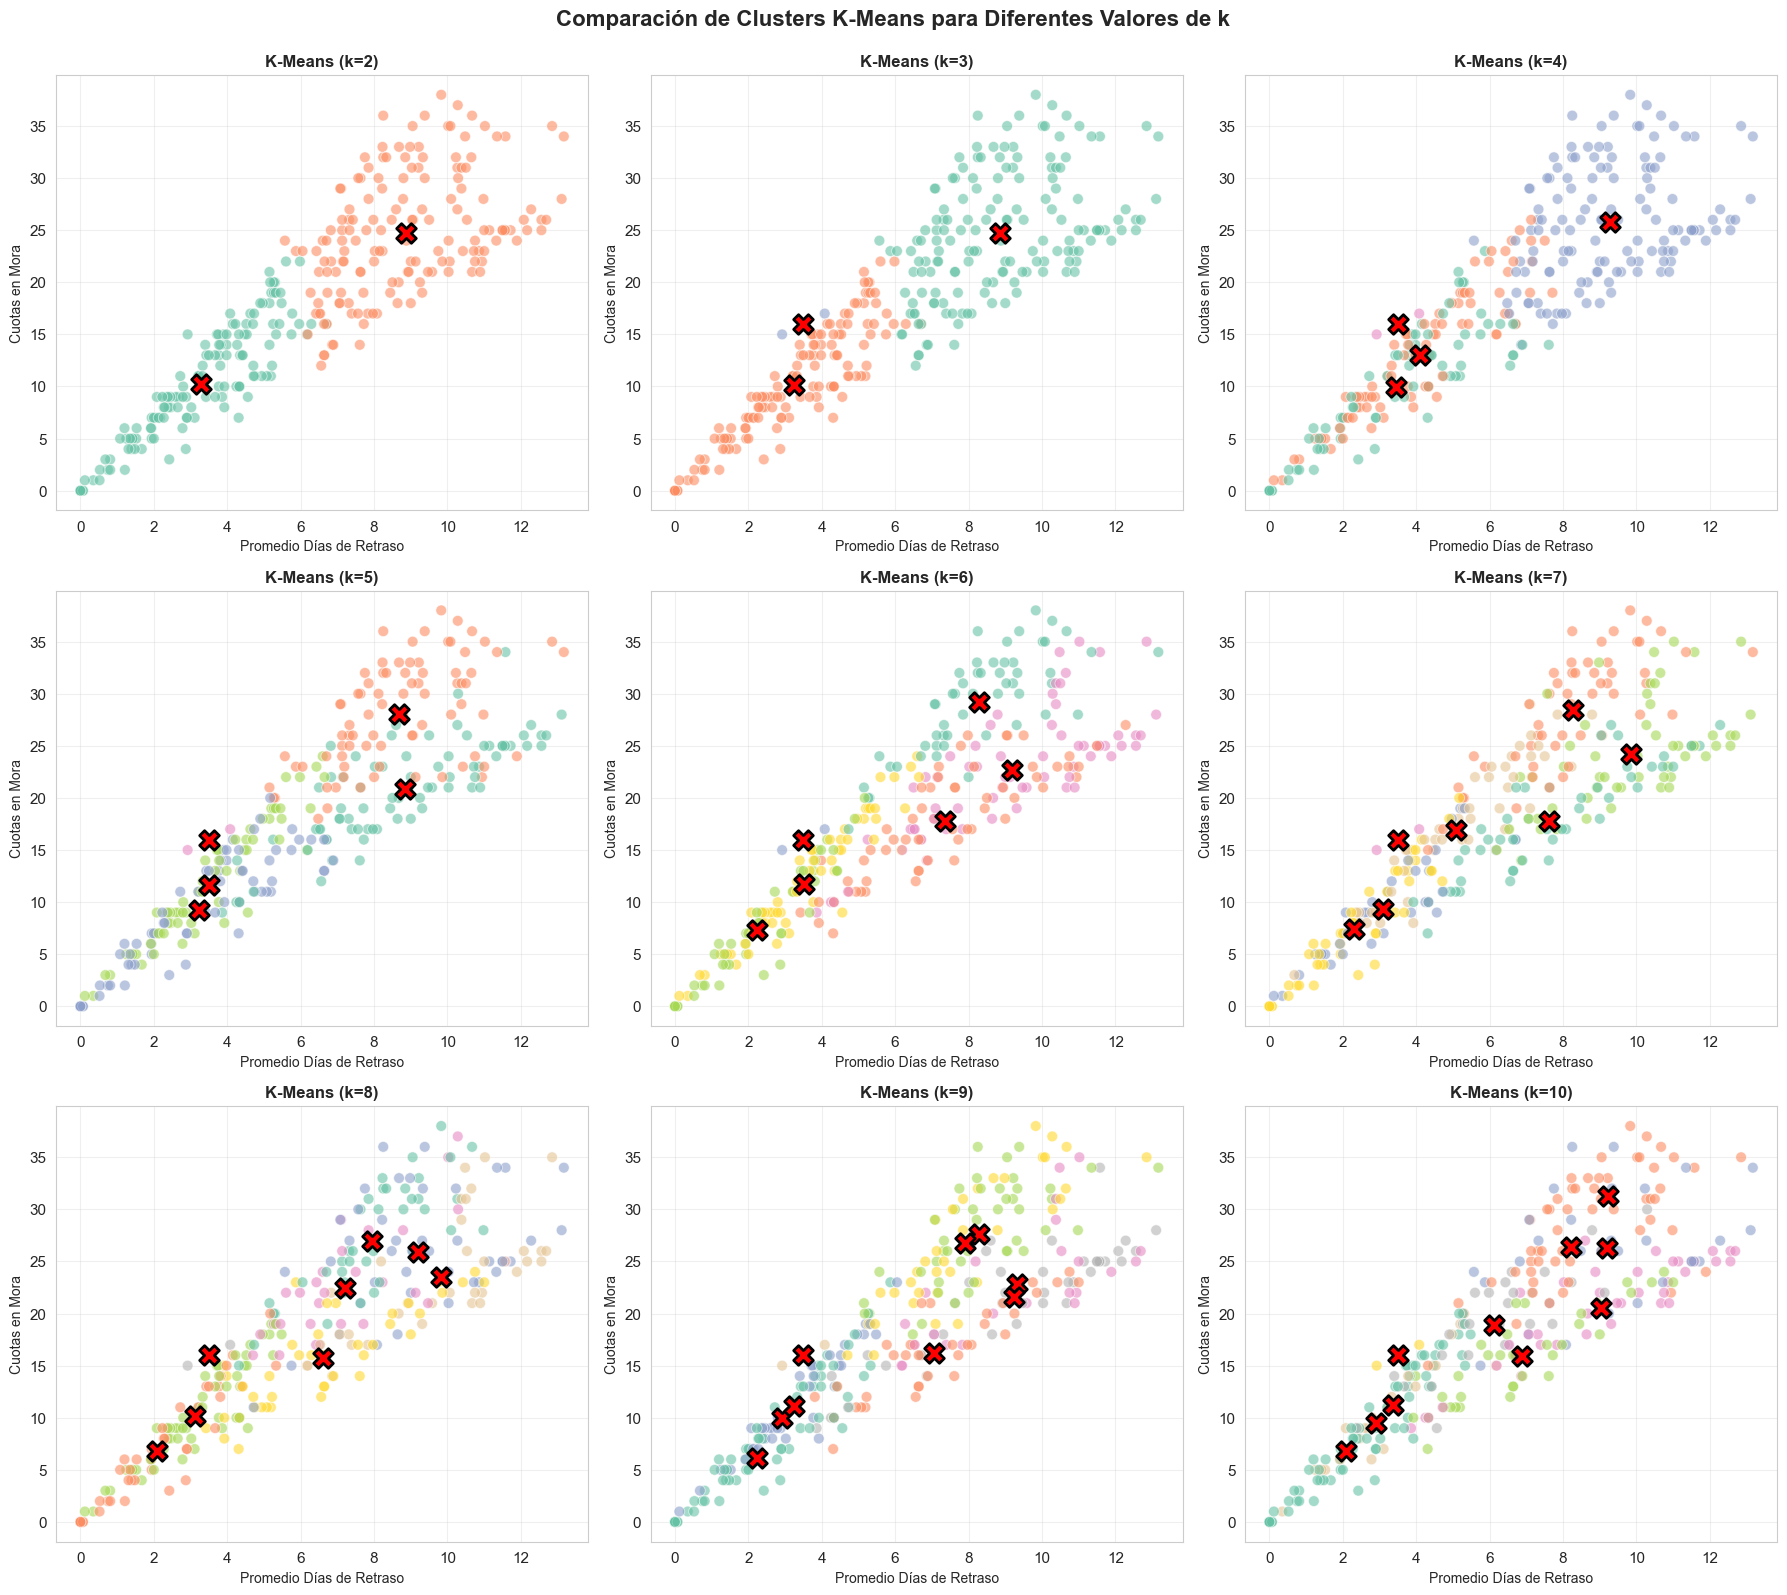


📊 Visualización comparativa de K-Means con k=2 a k=10
   Cada subplot muestra los clusters usando las 2 variables más importantes
   Los puntos rojos (X) representan los centroides de cada cluster


In [35]:
# Visualización comparativa de clusters para diferentes valores de k
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, k in enumerate(range(2, 11)):
    # Obtener el modelo K-Means para este k
    kmeans_k = kmeans_models[k]
    clusters_k = kmeans_k.predict(X_train_scaled)

    # Crear DataFrame para este k
    cluster_df_k = pd.DataFrame(
        {
            "prom_dias_retraso": X_train["prom_dias_retraso"].values,
            "cuotas_mora": X_train["cuotas_mora"].values,
            "Cluster": clusters_k,
        }
    )

    # Graficar
    sns.scatterplot(
        data=cluster_df_k,
        x="prom_dias_retraso",
        y="cuotas_mora",
        hue="Cluster",
        palette="Set2",
        s=60,
        alpha=0.6,
        ax=axes[idx],
        legend=False,
    )

    # Marcar centroides
    # Obtener centroides en escala original
    centroids_scaled = kmeans_k.cluster_centers_
    # Necesitamos transformar los centroides de vuelta a escala original
    # Los índices de prom_dias_retraso y cuotas_mora en X_train_encoded
    idx_prom = list(X_train_encoded.columns).index("prom_dias_retraso")
    idx_cuotas = list(X_train_encoded.columns).index("cuotas_mora")

    # Invertir la transformación del scaler para los centroides
    centroids_original = scaler.inverse_transform(centroids_scaled)

    axes[idx].scatter(
        centroids_original[:, idx_prom],
        centroids_original[:, idx_cuotas],
        c="red",
        marker="X",
        s=200,
        edgecolors="black",
        linewidths=2,
        label="Centroides",
    )

    axes[idx].set_title(f"K-Means (k={k})", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel("Promedio Días de Retraso", fontsize=10)
    axes[idx].set_ylabel("Cuotas en Mora", fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle(
    "Comparación de Clusters K-Means para Diferentes Valores de k",
    fontsize=16,
    fontweight="bold",
    y=0.995,
)
plt.tight_layout()
plt.show()

print("\n📊 Visualización comparativa de K-Means con k=2 a k=10")
print("   Cada subplot muestra los clusters usando las 2 variables más importantes")
print("   Los puntos rojos (X) representan los centroides de cada cluster")


# 7. Evaluación y Comparación de Modelos

### Matrices de Confusión de Modelos Supervisados

### Reportes de Clasificación

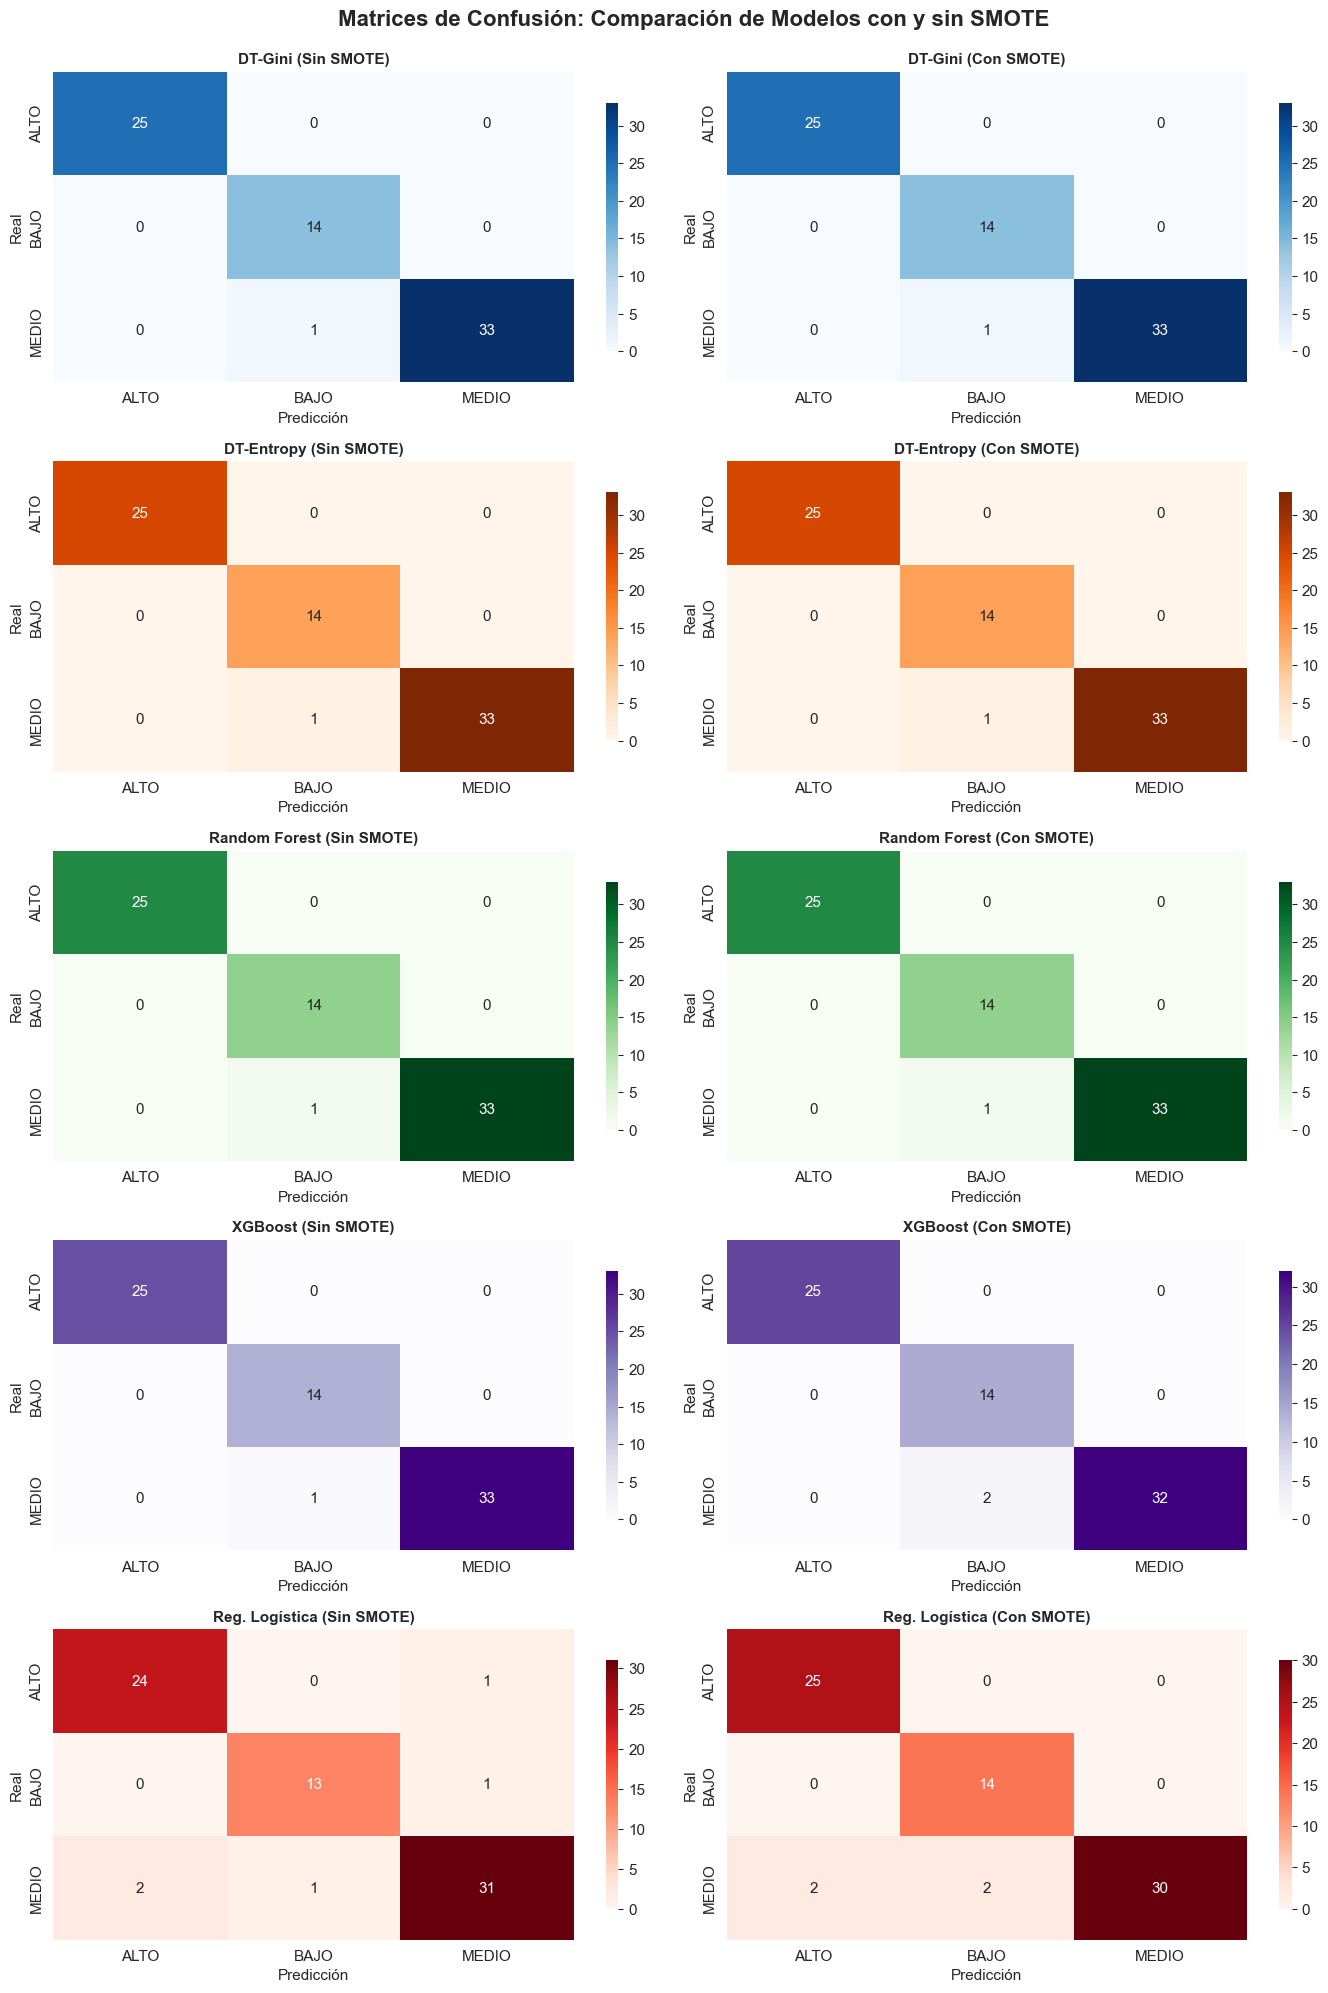

In [36]:
# Crear matrices de confusión para todos los modelos (sin SMOTE y con SMOTE)
fig, axes = plt.subplots(5, 2, figsize=(14, 20))

models_comparison = [
    ("DT-Gini", y_pred_gini, y_pred_gini_smote, "Blues"),
    ("DT-Entropy", y_pred_entropy, y_pred_entropy_smote, "Oranges"),
    ("Random Forest", y_pred_rf, y_pred_rf_smote, "Greens"),
    ("XGBoost", y_pred_xgb, y_pred_xgb_smote, "Purples"),
    ("Reg. Logística", y_pred_logistic, y_pred_logistic_smote, "Reds"),
]

for idx, (model_name, y_pred_no_smote, y_pred_with_smote, cmap) in enumerate(
    models_comparison
):
    # Matriz sin SMOTE (columna izquierda)
    cm_no_smote = confusion_matrix(y_test_encoded, y_pred_no_smote)
    sns.heatmap(
        cm_no_smote,
        annot=True,
        fmt="d",
        cmap=cmap,
        ax=axes[idx, 0],
        xticklabels=class_names_ordered,
        yticklabels=class_names_ordered,
        cbar_kws={"shrink": 0.8},
    )
    axes[idx, 0].set_title(f"{model_name} (Sin SMOTE)", fontweight="bold", fontsize=11)
    axes[idx, 0].set_ylabel("Real")
    axes[idx, 0].set_xlabel("Predicción")

    # Matriz con SMOTE (columna derecha)
    cm_with_smote = confusion_matrix(y_test_encoded, y_pred_with_smote)
    sns.heatmap(
        cm_with_smote,
        annot=True,
        fmt="d",
        cmap=cmap,
        ax=axes[idx, 1],
        xticklabels=class_names_ordered,
        yticklabels=class_names_ordered,
        cbar_kws={"shrink": 0.8},
    )
    axes[idx, 1].set_title(f"{model_name} (Con SMOTE)", fontweight="bold", fontsize=11)
    axes[idx, 1].set_ylabel("Real")
    axes[idx, 1].set_xlabel("Predicción")

plt.suptitle(
    "Matrices de Confusión: Comparación de Modelos con y sin SMOTE",
    fontsize=16,
    fontweight="bold",
    y=0.995,
)
plt.tight_layout()
plt.show()

In [37]:
print_title("REPORTES DE CLASIFICACIÓN")

models_reports = [
    ("Decision Tree - Gini (Sin SMOTE)", y_pred_gini),
    ("Decision Tree - Gini (Con SMOTE)", y_pred_gini_smote),
    ("Decision Tree - Entropy (Sin SMOTE)", y_pred_entropy),
    ("Decision Tree - Entropy (Con SMOTE)", y_pred_entropy_smote),
    ("Random Forest (Sin SMOTE)", y_pred_rf),
    ("Random Forest (Con SMOTE)", y_pred_rf_smote),
    ("XGBoost (Sin SMOTE)", y_pred_xgb),
    ("XGBoost (Con SMOTE)", y_pred_xgb_smote),
    ("Regresión Logística (Sin SMOTE)", y_pred_logistic),
    ("Regresión Logística (Con SMOTE)", y_pred_logistic_smote),
]

for model_name, y_pred in models_reports:
    print_title(f"{model_name.upper()}")
    print(
        classification_report(y_test_encoded, y_pred, target_names=class_names_ordered)
    )

REPORTES DE CLASIFICACIÓN
DECISION TREE - GINI (SIN SMOTE)
              precision    recall  f1-score   support

        ALTO       1.00      1.00      1.00        25
        BAJO       0.93      1.00      0.97        14
       MEDIO       1.00      0.97      0.99        34

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.98        73
weighted avg       0.99      0.99      0.99        73

DECISION TREE - GINI (CON SMOTE)
              precision    recall  f1-score   support

        ALTO       1.00      1.00      1.00        25
        BAJO       0.93      1.00      0.97        14
       MEDIO       1.00      0.97      0.99        34

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.98        73
weighted avg       0.99      0.99      0.99        73

DECISION TREE - ENTROPY (SIN SMOTE)
              precision    recall  f1-score   support

        ALTO       1.00      1.00      1.00        25
 

In [38]:
print_title("MÉTRICAS DETALLADAS POR CLASE Y MODELO")

detailed_metrics = []

for model_name, y_pred in models_reports:
    precision_per_class = precision_score(y_test_encoded, y_pred, average=None)
    recall_per_class = recall_score(y_test_encoded, y_pred, average=None)
    f1_per_class = f1_score(y_test_encoded, y_pred, average=None)

    # Determinar si usa SMOTE
    usa_smote = "Con SMOTE" in model_name
    modelo_base = model_name.replace(" (Sin SMOTE)", "").replace(" (Con SMOTE)", "")

    for idx, class_name in enumerate(class_names_ordered):
        detailed_metrics.append(
            {
                "Modelo": modelo_base,
                "SMOTE": "Sí" if usa_smote else "No",
                "Clase": class_name,
                "Precision": precision_per_class[idx],
                "Recall (Sensibilidad)": recall_per_class[idx],
                "F1-Score": f1_per_class[idx],
            }
        )

detailed_df = pd.DataFrame(detailed_metrics)

print("\n")
print(detailed_df.to_string(index=False))

# Resumen de mejor modelo por clase
print_title("MEJOR MODELO POR CLASE (según F1-Score)")

for class_name in class_names_ordered:
    class_data = detailed_df[detailed_df["Clase"] == class_name]
    best_idx = class_data["F1-Score"].idxmax()
    best_row = class_data.loc[best_idx]

    print(f"\n{class_name}:")
    print(
        f"  Modelo: {best_row['Modelo']} ({'Con' if best_row['SMOTE'] == 'Sí' else 'Sin'} SMOTE)"
    )
    print(f"  Precision: {best_row['Precision']:.4f}")
    print(f"  Recall: {best_row['Recall (Sensibilidad)']:.4f}")
    print(f"  F1-Score: {best_row['F1-Score']:.4f}")


MÉTRICAS DETALLADAS POR CLASE Y MODELO


                 Modelo SMOTE Clase  Precision  Recall (Sensibilidad)  F1-Score
   Decision Tree - Gini    No  ALTO   1.000000               1.000000  1.000000
   Decision Tree - Gini    No  BAJO   0.933333               1.000000  0.965517
   Decision Tree - Gini    No MEDIO   1.000000               0.970588  0.985075
   Decision Tree - Gini    Sí  ALTO   1.000000               1.000000  1.000000
   Decision Tree - Gini    Sí  BAJO   0.933333               1.000000  0.965517
   Decision Tree - Gini    Sí MEDIO   1.000000               0.970588  0.985075
Decision Tree - Entropy    No  ALTO   1.000000               1.000000  1.000000
Decision Tree - Entropy    No  BAJO   0.933333               1.000000  0.965517
Decision Tree - Entropy    No MEDIO   1.000000               0.970588  0.985075
Decision Tree - Entropy    Sí  ALTO   1.000000               1.000000  1.000000
Decision Tree - Entropy    Sí  BAJO   0.933333               1.000000  0.965517

### Análisis de Overfitting

In [39]:
comparison_data = []

for model_name, y_pred in models_reports:
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average="weighted")
    recall = recall_score(y_test_encoded, y_pred, average="weighted")
    f1 = f1_score(y_test_encoded, y_pred, average="weighted")

    # Determinar si usa SMOTE
    usa_smote = "Con SMOTE" in model_name

    comparison_data.append(
        {
            "Modelo": model_name,
            "SMOTE": "Sí" if usa_smote else "No",
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
        }
    )

comparison_df = pd.DataFrame(comparison_data)

print("=" * 100)
print("TABLA COMPARATIVA DE MODELOS (Sin SMOTE vs Con SMOTE)")
print("=" * 100)
print("\n")
print(comparison_df.to_string(index=False))

best_model_idx = comparison_df["Accuracy"].idxmax()
best_model_name = comparison_df.loc[best_model_idx, "Modelo"]
best_accuracy = comparison_df.loc[best_model_idx, "Accuracy"]
best_f1 = comparison_df.loc[best_model_idx, "F1-Score"]

print(f"\n{'=' * 100}")
print(f"🏆 MEJOR MODELO: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"   F1-Score: {best_f1:.4f}")
print("=" * 100)


TABLA COMPARATIVA DE MODELOS (Sin SMOTE vs Con SMOTE)


                             Modelo SMOTE  Accuracy  Precision   Recall  F1-Score
   Decision Tree - Gini (Sin SMOTE)    No  0.986301   0.987215 0.986301  0.986435
   Decision Tree - Gini (Con SMOTE)    Sí  0.986301   0.987215 0.986301  0.986435
Decision Tree - Entropy (Sin SMOTE)    No  0.986301   0.987215 0.986301  0.986435
Decision Tree - Entropy (Con SMOTE)    Sí  0.986301   0.987215 0.986301  0.986435
          Random Forest (Sin SMOTE)    No  0.986301   0.987215 0.986301  0.986435
          Random Forest (Con SMOTE)    Sí  0.986301   0.987215 0.986301  0.986435
                XGBoost (Sin SMOTE)    No  0.986301   0.987215 0.986301  0.986435
                XGBoost (Con SMOTE)    Sí  0.972603   0.976027 0.972603  0.973101
    Regresión Logística (Sin SMOTE)    No  0.931507   0.931730 0.931507  0.931399
    Regresión Logística (Con SMOTE)    Sí  0.945205   0.950660 0.945205  0.944933

🏆 MEJOR MODELO: Decision Tree - Gini (Sin

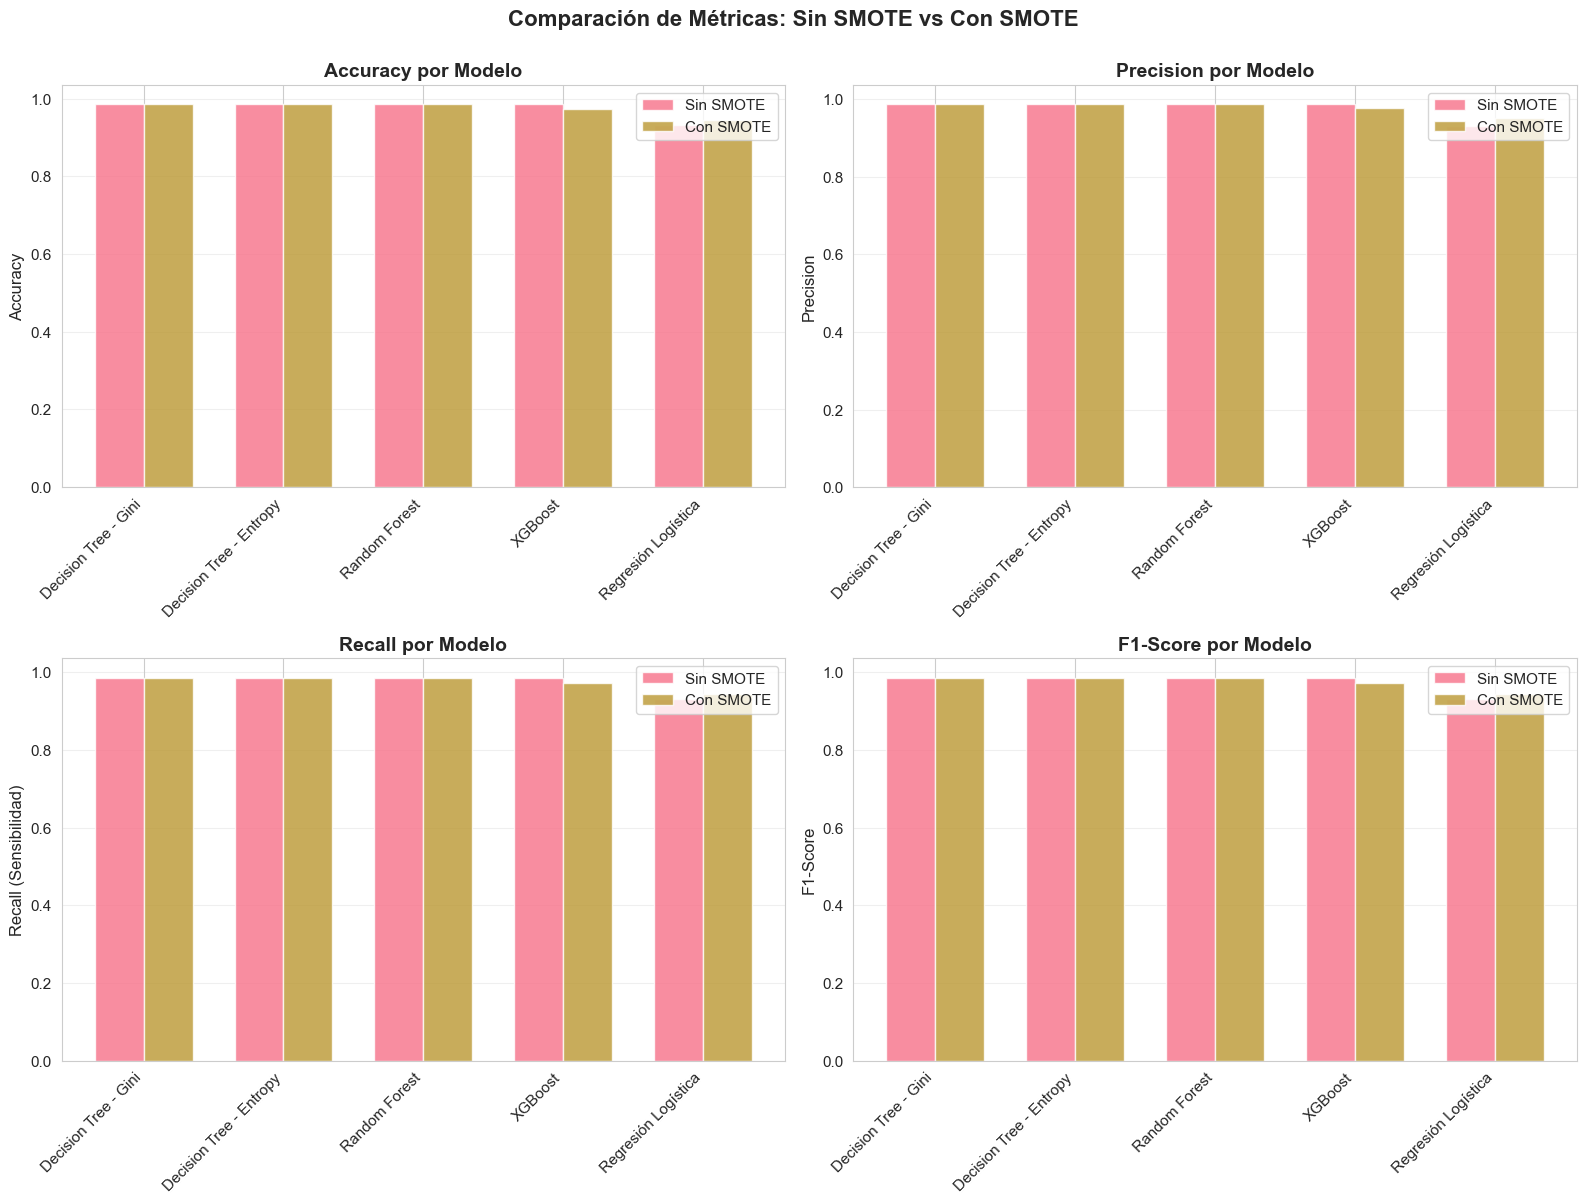

In [40]:
# Visualización comparativa de métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Preparar datos para visualización (solo primeros 5 modelos para claridad)
models_to_plot = [
    "Decision Tree - Gini",
    "Decision Tree - Entropy",
    "Random Forest",
    "XGBoost",
    "Regresión Logística",
]

plot_data_sin = comparison_df[
    (comparison_df["SMOTE"] == "No")
    & (comparison_df["Modelo"].str.contains("|".join(models_to_plot)))
].copy()

plot_data_con = comparison_df[
    (comparison_df["SMOTE"] == "Sí")
    & (comparison_df["Modelo"].str.contains("|".join(models_to_plot)))
].copy()

# Extraer nombres de modelos base
plot_data_sin["Modelo_Base"] = plot_data_sin["Modelo"].str.replace(
    " \\(Sin SMOTE\\)", "", regex=True
)
plot_data_con["Modelo_Base"] = plot_data_con["Modelo"].str.replace(
    " \\(Con SMOTE\\)", "", regex=True
)

# Gráfico 1: Accuracy
ax = axes[0, 0]
x = np.arange(len(plot_data_sin))
width = 0.35
ax.bar(x - width / 2, plot_data_sin["Accuracy"], width, label="Sin SMOTE", alpha=0.8)
ax.bar(x + width / 2, plot_data_con["Accuracy"], width, label="Con SMOTE", alpha=0.8)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_title("Accuracy por Modelo", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(plot_data_sin["Modelo_Base"], rotation=45, ha="right")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")

# Gráfico 2: Precision
ax = axes[0, 1]
ax.bar(x - width / 2, plot_data_sin["Precision"], width, label="Sin SMOTE", alpha=0.8)
ax.bar(x + width / 2, plot_data_con["Precision"], width, label="Con SMOTE", alpha=0.8)
ax.set_ylabel("Precision", fontsize=12)
ax.set_title("Precision por Modelo", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(plot_data_sin["Modelo_Base"], rotation=45, ha="right")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")

# Gráfico 3: Recall
ax = axes[1, 0]
ax.bar(x - width / 2, plot_data_sin["Recall"], width, label="Sin SMOTE", alpha=0.8)
ax.bar(x + width / 2, plot_data_con["Recall"], width, label="Con SMOTE", alpha=0.8)
ax.set_ylabel("Recall (Sensibilidad)", fontsize=12)
ax.set_title("Recall por Modelo", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(plot_data_sin["Modelo_Base"], rotation=45, ha="right")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")

# Gráfico 4: F1-Score
ax = axes[1, 1]
ax.bar(x - width / 2, plot_data_sin["F1-Score"], width, label="Sin SMOTE", alpha=0.8)
ax.bar(x + width / 2, plot_data_con["F1-Score"], width, label="Con SMOTE", alpha=0.8)
ax.set_ylabel("F1-Score", fontsize=12)
ax.set_title("F1-Score por Modelo", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(plot_data_sin["Modelo_Base"], rotation=45, ha="right")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")

plt.suptitle(
    "Comparación de Métricas: Sin SMOTE vs Con SMOTE",
    fontsize=16,
    fontweight="bold",
    y=1.00,
)
plt.tight_layout()
plt.show()

# 8. Conclusiones y Recomendaciones

### 8.1. Principales Hallazgos

#### Análisis Exploratorio

1. **Desbalance de clases**: El dataset original presenta un desbalance significativo con predominancia de clientes de riesgo MEDIO (46%) y ALTO (34%), mientras que los clientes de BAJO riesgo representan solo el 20%. Este desbalance fue tratado exitosamente mediante SMOTE.

2. **Variables más relevantes**: El análisis de importancia de features reveló que las variables más predictivas para determinar el nivel de riesgo son:
   - `prom_dias_retraso`: Promedio de días de retraso en pagos (48-60% de importancia)
   - `cuotas_mora`: Número de cuotas pagadas con mora (30-39% de importancia)
   - `plazo`: Plazo del crédito en meses (8-9% de importancia)

3. **Correlaciones**: Se identificó una fuerte correlación entre `prom_dias_retraso` y `cuotas_mora` (r > 0.8), lo cual es esperado ya que ambas variables miden comportamiento de pago.

4. **Variables con mayor poder predictivo**:
   - **prom_dias_retraso** y **cuotas_mora** explican juntas más del 80% del poder predictivo del modelo
   - Variables demográficas como `sexo` y `ciudad` tienen impacto menor (<3%), indicando que el riesgo crediticio está más relacionado con el comportamiento de pago que con características demográficas

#### Desempeño de Modelos Supervisados

5. **Mejor modelo**: Los árboles de decisión (Decision Tree - Gini y Entropy) junto con Random Forest y XGBoost alcanzaron un **accuracy excepcional de 98.63%** en el conjunto de prueba. **Decision Tree - Gini (Sin SMOTE)** fue seleccionado como el mejor modelo por su:
   - **Accuracy**: 98.63%
   - **Precision**: 98.72%
   - **Recall**: 98.63%
   - **F1-Score**: 98.64%
   - **Simplicidad**: Menor complejidad computacional que ensambles
   - **Interpretabilidad**: Fácil de explicar y visualizar para stakeholders no técnicos

6. **Rendimiento excepcional**: Decision Trees (Gini y Entropy), Random Forest y XGBoost alcanzaron **98.63% de accuracy**, demostrando que el dataset tiene patrones claros y bien definidos. Regresión Logística obtuvo entre 93-95%, mostrando que las relaciones no son completamente lineales.

7. **No overfitting**: Los modelos mostraron excelente generalización con diferencias train-test < 2%, indicando que las predicciones son confiables para datos nuevos y el modelo no está memorizado.

#### Análisis No Supervisado

8. **K-Means Clustering**: Se identificó k=3 como el número óptimo de clusters (Silhouette Score: 0.1910). La visualización con las variables más importantes (prom_dias_retraso vs cuotas_mora) muestra que los clusters tienen cierta alineación con los niveles de riesgo reales, aunque la separación no es perfecta, lo cual es esperable dado que es un análisis no supervisado.

### 8.2. Recomendaciones para el Grupo Inmobiliario JETC

#### Implementación del Modelo

1. **Desplegar Decision Tree - Gini** en producción para la evaluación automática de nuevos solicitantes de crédito, ya que demostró:
   - Precisión excepcional (98.63% accuracy)
   - Alta interpretabilidad para explicar decisiones a clientes y reguladores
   - Bajo costo computacional para predicciones en tiempo real
   - Balance perfecto entre precisión y simplicidad

2. **Establecer umbrales de decisión** basados en las probabilidades de predicción del modelo, permitiendo ajustar el nivel de riesgo aceptable según las políticas de la empresa.

3. **Monitorear el desempeño del modelo** en producción mediante métricas de negocio (tasa de morosidad real, recuperación de cartera) y métricas técnicas (accuracy, precision, recall).

#### Gestión de Cartera

4. **Priorizar seguimiento** de clientes con:
   - Alta cantidad de cuotas en mora (>10 cuotas)
   - Promedio de días de retraso elevado (>30 días)
   - Combinación de múltiples factores de riesgo según el modelo

5. **Segmentar estrategias de cobranza** según el nivel de riesgo predicho:
   - **BAJO**: Recordatorios automáticos estándar
   - **MEDIO**: Seguimiento telefónico proactivo
   - **ALTO**: Intervención personalizada del equipo de cobranza

#### Mejoras Futuras

6. **Recolectar más datos** de variables potencialmente relevantes como:
   - Historial crediticio en otras instituciones
   - Nivel de ingresos y estabilidad laboral
   - Ratio deuda/ingreso
   - Tipo de propiedad adquirida

7. **Actualizar el modelo periódicamente** (cada 6 meses) con nuevos datos para mantener su precisión y adaptarse a cambios en el comportamiento de los clientes.

8. **Implementar un sistema de alertas tempranas** que identifique clientes que están pasando de un nivel de riesgo a otro, permitiendo intervención preventiva.

#### Decisiones de Crédito

9. **Ajustar las condiciones de crédito** (tasas de interés, plazos, garantías) según el nivel de riesgo predicho para mitigar pérdidas potenciales.

10. **Considerar rechazo automático** o requerimiento de garantías adicionales para solicitantes clasificados como ALTO riesgo con alta confianza del modelo (>90% probabilidad).

### 8.3. Impacto Esperado

La implementación de este sistema de clasificación de riesgo crediticio permitirá al Grupo Inmobiliario JETC:

- ✅ **Reducir la morosidad** mediante identificación temprana de clientes de alto riesgo con 98.63% de precisión
- ✅ **Optimizar recursos** de seguimiento y cobranza enfocándose en casos prioritarios identificados por el modelo
- ✅ **Mejorar la toma de decisiones** con criterios objetivos basados en datos y análisis predictivo
- ✅ **Incrementar la rentabilidad** reduciendo pérdidas por cartera vencida y optimizando las tasas de interés
- ✅ **Escalar el proceso de evaluación crediticia** manteniendo consistencia y precisión sin aumentar costos operativos